In [1]:
import warnings
warnings.simplefilter('ignore')

import joblib
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, roc_auc_score, precision_recall_curve, 
                             average_precision_score,  f1_score, precision_score, recall_score, 
                             accuracy_score, classification_report, roc_curve)
from sklearn.metrics import make_scorer

from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree, export_text

# 1. Dataset overview

–î–∞—Ç–∞—Å–µ—Ç —Å–æ–¥–µ—Ä–∂–∏—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –∫—Ä–µ–¥–∏—Ç–∞—Ö –≤—ã–¥–∞–Ω–Ω—ã—Ö –Ω–∞ –ø–æ–∫—É–ø–∫—É –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏.

| Variable |	Description |
|----------|----------------|
|ID	       |–∏–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –∑–∞—è–≤–∫–∏ –∫–ª–∏–µ–Ω—Ç–∞ –Ω–∞ –∫—Ä–µ–¥–∏—Ç|
|year	   |–≥–æ–¥ –ø–æ–¥–∞—á–∏ –∑–∞—è–≤–∫–∏ –Ω–∞ –∫—Ä–µ–¥–∏—Ç|
|loan_limit|—É–∫–∞–∑—ã–≤–∞–µ—Ç, —è–≤–ª—è–µ—Ç—Å—è –ª–∏ –∫—Ä–µ–¥–∏—Ç —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–º –ª–∏–º–∏—Ç–∞–º (cf) –∏–ª–∏ –Ω–µ—Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–º (ncf)|
|Gender	   |–ø–æ–ª –∑–∞—ë–º—â–∏–∫–∞ (male, female, joint, sex not available)|
|approv_in_adv|	—É–∫–∞–∑—ã–≤–∞–µ—Ç, –±—ã–ª –ª–∏ –∫—Ä–µ–¥–∏—Ç –æ–¥–æ–±—Ä–µ–Ω –∑–∞—Ä–∞–Ω–µ–µ (pre, nopre)|
|loan_type |—Ç–∏–ø –∫—Ä–µ–¥–∏—Ç–∞ (type1, type2, type3)|
|loan_purpose|	—Ü–µ–ª—å –∫—Ä–µ–¥–∏—Ç–∞ (p1, p2, p3, p4)|
|Credit_Worthiness |	–∫—Ä–µ–¥–∏—Ç–æ—Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –∑–∞—ë–º—â–∏–∫–∞ (l1, l2)|
|open_credit|	—É–∫–∞–∑—ã–≤–∞–µ—Ç, –µ—Å—Ç—å –ª–∏ —É –∑–∞—è–≤–∏—Ç–µ–ª—è –æ—Ç–∫—Ä—ã—Ç—ã–µ –∫—Ä–µ–¥–∏—Ç–Ω—ã–µ —Å—á–µ—Ç–∞ (opc, nopc)|
|business_or_commercial|	—É–∫–∞–∑—ã–≤–∞–µ—Ç, –ø—Ä–µ–¥–Ω–∞–∑–Ω–∞—á–µ–Ω –ª–∏ –∫—Ä–µ–¥–∏—Ç –¥–ª—è –±–∏–∑–Ω–µ—Å—Å–∞/–∫–æ–º–º–µ—Ä—á–µ—Å–∫–∏—Ö —Ü–µ–ª–µ–π (ob/c - - business/commercial, nob/c - personal)|
|loan_amount|	—Ä–∞–∑–º–µ—Ä –∫—Ä–µ–¥–∏—Ç–∞|
|rate_of_interest|	–ø—Ä–æ—Ü–µ–Ω—Ç–Ω–∞—è —Å—Ç–∞–≤–∫–∞ –ø–æ –∫—Ä–µ–¥–∏—Ç—É|
|Interest_rate_spread|	—Ä–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–π —Å—Ç–∞–≤–∫–æ–π –ø–æ –∫—Ä–µ–¥–∏—Ç—É –∏ –±–∞–∑–æ–≤–æ–π –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–π —Å—Ç–∞–≤–∫–æ–π|
|Upfront_charges |	—ç—Ç–æ –ø–µ—Ä–≤–æ–Ω–∞—á–∞–ª—å–Ω—ã–µ —Å–±–æ—Ä—ã, –∫–æ—Ç–æ—Ä—ã–µ –≤–∑–∏–º–∞—é—Ç—Å—è –ø—Ä–∏ –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏–∏ –∫—Ä–µ–¥–∏—Ç–∞, —Ç–æ –µ—Å—Ç—å —Ä–∞—Å—Ö–æ–¥—ã, —Å–≤—è–∑–∞–Ω–Ω—ã–µ —Å –ø–æ–ª—É—á–µ–Ω–∏–µ–º –∑–∞–π–º–∞. –ö —Ç–∞–∫–∏–º —Å–±–æ—Ä–∞–º –º–æ–≥—É—Ç –æ—Ç–Ω–æ—Å–∏—Ç—å—Å—è –∫–æ–º–∏—Å—Å–∏–∏ –∑–∞ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–∏–µ –∑–∞—è–≤–∫–∏, –æ—Ü–µ–Ω–∫–∞ –∏–º—É—â–µ—Å—Ç–≤–∞ (–µ—Å–ª–∏ —ç—Ç–æ –∑–∞–ª–æ–≥–æ–≤—ã–π –∫—Ä–µ–¥–∏—Ç), —É—Å–ª—É–≥–∏ –Ω–æ—Ç–∞—Ä–∏—É—Å–∞, —Å—Ç—Ä–∞—Ö–æ–≤–∞–Ω–∏–µ –∏ –¥—Ä—É–≥–∏–µ –ø–ª–∞—Ç–µ–∂–∏, –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –¥–ª—è –æ—Ñ–æ—Ä–º–ª–µ–Ω–∏—è –∏ –≤—ã–¥–∞—á–∏ –∫—Ä–µ–¥–∏—Ç–Ω—ã—Ö —Å—Ä–µ–¥—Å—Ç–≤|
|term |—Å—Ä–æ–∫ –∫—Ä–µ–¥–∏—Ç–∞ –≤ –º–µ—Å—è—Ü–∞—Ö	|
|Neg_ammortization |	—É–∫–∞–∑—ã–≤–∞–µ—Ç, –¥–æ–ø—É—Å–∫–∞–µ—Ç –ª–∏ –∫—Ä–µ–¥–∏—Ç –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—É—é –∞–º–æ—Ä—Ç–∏–∑–∞—Ü–∏—é (neg_amm, not_neg)|
|interest_only |	—É–∫–∞–∑—ã–≤–∞–µ—Ç, –µ—Å—Ç—å –ª–∏ —É –∫—Ä–µ–¥–∏—Ç–∞ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –æ–ø–ª–∞—Ç—ã —Ç–æ–ª—å–∫–æ –ø—Ä–æ—Ü–µ–Ω—Ç–æ–≤ (int_only, not_int)|
|lump_sum_payment |	—É–∫–∞–∑—ã–≤–∞–µ—Ç, —Ç—Ä–µ–±—É–µ—Ç—Å—è –ª–∏ –µ–¥–∏–Ω–æ–≤—Ä–µ–º–µ–Ω–Ω—ã–π –ø–ª–∞—Ç–µ–∂ –≤ –∫–æ–Ω—Ü–µ —Å—Ä–æ–∫–∞ –∫—Ä–µ–¥–∏—Ç–∞ (lpsm, not_lpsm)|
|property_value |	—Å—Ç–æ–∏–º–æ—Å—Ç—å —Ñ–∏–Ω–∞–Ω—Å–∏—Ä—É–µ–º–æ–π –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏|
|construction_type |	—Ç–∏–ø –∑–¥–∞–Ω–∏—è (sb - site built, mh - manufactured home)|
|occupancy_type |	–∫–∞—Ç–µ–≥–æ—Ä–∏—è –∑–¥–∞–Ω–∏—è –ø–æ –Ω–∞–∑–Ω–∞—á–µ–Ω–∏—é (pr - primary residence, sr- secondary residence, ir - investment property)|
|Secured_by|	—Ç–∏–ø –∑–∞–ª–æ–≥–∞, –æ–±–µ—Å–ø–µ—á–∏–≤–∞—é—â–µ–≥–æ –∫—Ä–µ–¥–∏—Ç (home, land)|
|total_units|	–∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —é–Ω–∏—Ç–æ–≤/–æ–±—ä–µ–∫—Ç–æ–≤ –≤ —Ñ–∏–Ω–∞–Ω—Å–∏—Ä—É–µ–º–æ–º –æ–±—ä–µ–∫—Ç–µ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ (1U, 2U, 3U, 4U)|
|income|	–≥–æ–¥–æ–≤–æ–π –¥–æ—Ö–æ–¥ –∑–∞—è–≤–∏—Ç–µ–ª—è|
|credit_type|	—Ç–∏–ø –∫—Ä–µ–¥–∏—Ç–∞ (CIB - credit information bureau , CRIF - CIRF credit - information bureau, EXP - experian , EQUI - equifax)|
|Credit_Score|	–∫—Ä–µ–¥–∏—Ç–Ω—ã–π —Ä–µ–π—Ç–∏–Ω–≥ –∑–∞—è–≤–∏—Ç–µ–ª—è|
|co-applicant_credit_type|	—Ç–∏–ø –∫—Ä–µ–¥–∏—Ç–∞ —Å–æ–∑–∞—è–≤–∏—Ç–µ–ª—è (CIB - credit information bureau EXP - experian)|
|age |	–≤–æ–∑—Ä–∞—Å—Ç –∑–∞—ë–º—â–∏–∫–∞|
|submission_of_application|	—É–∫–∞–∑—ã–≤–∞–µ—Ç, –∫–∞–∫ –±—ã–ª–æ –ø–æ–¥–∞–Ω–æ –∑–∞—è–≤–ª–µ–Ω–∏–µ (to_inst - to institution (–≤ —É—á—Ä–µ–∂–¥–µ–Ω–∏–∏, –ª–∏—á–Ω–æ), - not_inst - not to institution)|
|LTV|	–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏—è —Å—É–º–º—ã –∫—Ä–µ–¥–∏—Ç–∞ –∫ —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏, —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞–µ–º—ã–π –∫–∞–∫ —Å—É–º–º–∞ –∫—Ä–µ–¥–∏—Ç–∞, –¥–µ–ª–µ–Ω–Ω–∞—è –Ω–∞ —Å—Ç–æ–∏–º–æ—Å—Ç—å –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏|
|Region|	–≥–µ–æ–≥—Ä–∞—Ñ–∏—á–µ—Å–∫–∏–π —Ä–µ–≥–∏–æ–Ω, –≤ –∫–æ—Ç–æ—Ä–æ–º –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç—å (North, south, central, North-East)|
|Security_Type|	—Ç–∏–ø –æ–±–µ—Å–ø–µ—á–µ–Ω–∏—è –∏–ª–∏ –∑–∞–ª–æ–≥–∞, –æ–±–µ—Å–ø–µ—á–∏–≤–∞—é—â–µ–≥–æ –∫—Ä–µ–¥–∏—Ç(direct, indirect)|
|Status|	—É–∫–∞–∑—ã–≤–∞–µ—Ç, –±—ã–ª –ª–∏ –∫—Ä–µ–¥–∏—Ç –Ω–µ–≤—ã–ø–ª–∞—á–µ–Ω (1) –∏–ª–∏ –Ω–µ—Ç (0)|
|dtir1|	—Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –¥–æ–ª–≥–∞ –∫ –¥–æ—Ö–æ–¥—É|

In [401]:
data = pd.read_csv(r'Data\Loan_Default.csv')

In [402]:
data.describe()

ID      year   loan_amount  rate_of_interest  \
count  148670.000000  148670.0  1.486700e+05     112231.000000   
mean    99224.500000    2019.0  3.311177e+05          4.045476   
std     42917.476598       0.0  1.839093e+05          0.561391   
min     24890.000000    2019.0  1.650000e+04          0.000000   
25%     62057.250000    2019.0  1.965000e+05          3.625000   
50%     99224.500000    2019.0  2.965000e+05          3.990000   
75%    136391.750000    2019.0  4.365000e+05          4.375000   
max    173559.000000    2019.0  3.576500e+06          8.000000   

       Interest_rate_spread  Upfront_charges           term  property_value  \
count         112031.000000    109028.000000  148629.000000    1.335720e+05   
mean               0.441656      3224.996127     335.136582    4.978935e+05   
std                0.513043      3251.121510      58.409084    3.599353e+05   
min               -3.638000         0.000000      96.000000    8.000000e+03   
25%                0.076000       581.490000     360.000000    2.680000e+05   
50%                0.390400      2596.450000     360.000000    4.180000e+05   
75%                0.775400      4812.500000     360.000000    6.280000e+05   
max                3.357000     60000.000000     360.000000    1.650800e+07   

              income   Credit_Score            LTV         Status  \
count  139520.000000  148670.000000  133572.000000  148670.000000   
mean     6957.338876     699.789103      72.746457       0.246445   
std      6496.586382     115.875857      39.967603       0.430942   
min         0.000000     500.000000       0.967478       0.000000   
25%      3720.000000     599.000000      60.474860       0.000000   
50%      5760.000000     699.000000      75.135870       0.000000   
75%      8520.000000     800.000000      86.184211       0.000000   
max    578580.000000     900.000000    7831.250000       1.000000   

               dtir1  
count  124549.000000  
mean       37.732932  
std        10.545435  
min         5.000000  
25%        31.000000  
50%        39.000000  
75%        45.000000  
max        61.000000

In [403]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [404]:
for feature in data.columns.to_list():
    print(data[feature].value_counts())

ID
24890     1
123979    1
123999    1
124000    1
124001    1
         ..
74447     1
74448     1
74449     1
74450     1
173559    1
Name: count, Length: 148670, dtype: int64
year
2019    148670
Name: count, dtype: int64
loan_limit
cf     135348
ncf      9978
Name: count, dtype: int64
Gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64
approv_in_adv
nopre    124621
pre       23141
Name: count, dtype: int64
loan_type
type1    113173
type2     20762
type3     14735
Name: count, dtype: int64
loan_purpose
p3    55934
p4    54799
p1    34529
p2     3274
Name: count, dtype: int64
Credit_Worthiness
l1    142344
l2      6326
Name: count, dtype: int64
open_credit
nopc    148114
opc        556
Name: count, dtype: int64
business_or_commercial
nob/c    127908
b/c       20762
Name: count, dtype: int64
loan_amount
206500     4610
256500     4079
156500     3967
226500     3944
486500     3819
           ... 
2

## 1.1 –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π

–î–∞–≤–∞–π—Ç–µ –±–æ–ª–µ–µ –ø–æ–¥—Ä–æ–±–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ —Ü–µ–ª–µ–≤—ã—Ö –∫–ª–∞—Å—Å–æ–≤.

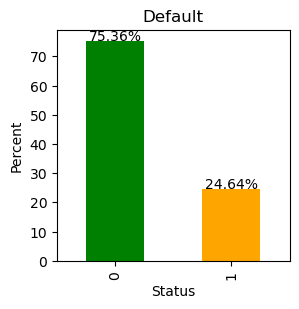

In [405]:
def draw_target_percents(data):
    percent_class = (data['Status'].value_counts() / data.shape[0] * 100)
    colors = ['green', 'orange']
    percent_class.plot(kind='bar', label='Churn', ylabel='Percent', color=colors, figsize=(3,3))
    plt.title('Default')
    for index in percent_class.keys():
        plt.text(index, percent_class[index], '{:.2f}%'.format(percent_class[index]),ha='center')
draw_target_percents(data)

–î–æ–ª–∏ –æ–±—ä–µ–∫—Ç–æ–≤ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω–æ–≥–æ –∫–ª–∞—Å—Å–∞ —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ —Ä–∞–∑–ª–∏—á–∞—é—Ç—Å—è, –∫–ª–∞—Å—Å—ã –Ω–µ —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω—ã. –í—ã–ø–ª–∞—á–µ–Ω–Ω—ã—Ö –∫—Ä–µ–¥–∏—Ç–æ–≤ - 75%, –∞ –Ω–µ –≤—ã–ø–ª–∞—á–µ–Ω–Ω—ã—Ö - 25%.

## 1.2 –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–æ–ø—É—Å–∫–æ–≤ –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º.

–í –¥–∞—Ç–∞—Å–µ—Ç–µ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –º–Ω–æ–≥–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö. –†–∞—Å—Å–º–æ—Ç—Ä–∏–º –ø—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞. 

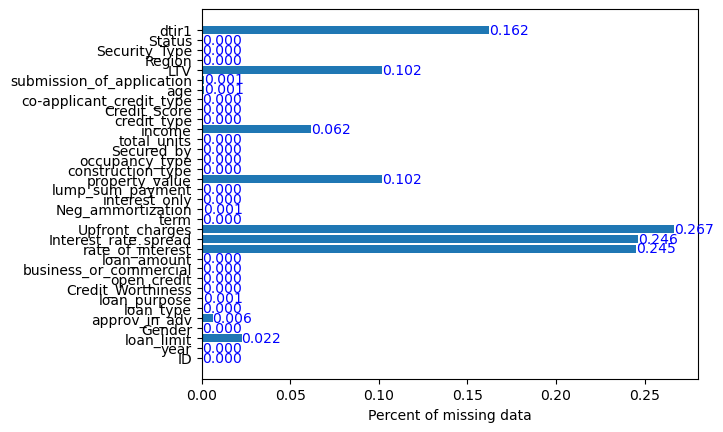

In [406]:
def draw_percent_of_missed_data(data): 
    column_names = data.columns.to_list()
    amt_data = data.shape[0]
    skipDataByFeatures = {}
    for feature in column_names:
        prcnt_skip_data = data[feature].isnull().sum() / amt_data
        skipDataByFeatures[feature] = prcnt_skip_data
        

    categories, values = list(skipDataByFeatures.keys()), list(skipDataByFeatures.values())
    fig, ax = plt.subplots()
    bars = ax.barh(categories, values)
    ax.set_xlabel('Percent of missing data')
    ax.bar_label(bars, label_type='edge', color='blue', labels= [f"{p:.3f}"  for p in values ])
    plt.show()

draw_percent_of_missed_data(data)

–ë–æ–ª—å—à–µ –≤—Å–µ–≥–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ —É –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ dtir1, LTV, propertry_value, Upfront_charges, Interes_rate_spread, rate_of_interest.

# 2. Data preprocessing. Filling in the blanks

## Category features

In [467]:
data_processed = data

In [468]:
data_processed.Security_Type.value_counts()

Security_Type
direct      148637
Indriect        33
Name: count, dtype: int64

'Security_Type' –∑–∞ –æ—á–µ–Ω—å —Ä–µ–¥–∫–∏–º –∏—Å–∫–ª—é—á–µ–Ω–∏–µ–º direct. –ü–æ—ç—Ç–æ–º—É —ç—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫ –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–µ–Ω, —É–¥–∞–ª—è–µ–º –µ–≥–æ. 

In [469]:
data_processed = data_processed.drop(['Security_Type'], axis= 1)

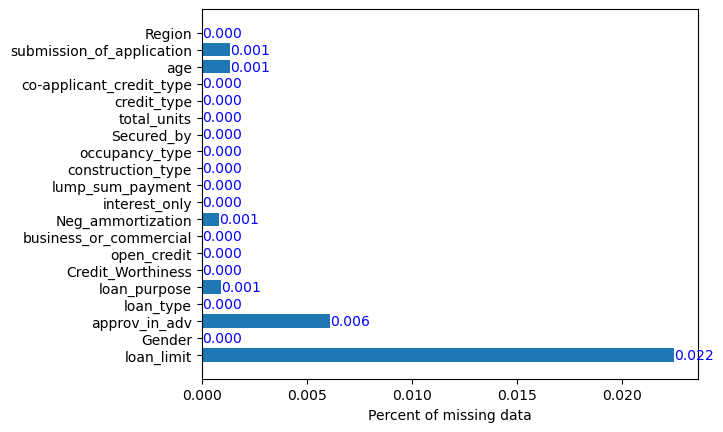

In [470]:
categorical_features = data_processed.select_dtypes(include=['object']).columns.tolist()
draw_percent_of_missed_data(data_processed[categorical_features])

–ü—Ä–æ–ø—É—Å–∫–æ–≤ –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –º–∞–ª–æ (–º–µ–Ω–µ–µ 2%), –ø–æ—ç—Ç–æ–º—É –ø—Ä–æ—Å—Ç–æ —É–¥–∞–ª–∏–º —Å—Ç—Ä–æ–∫–∏ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏.

In [471]:
data_processed = data_processed.dropna(subset=categorical_features, how='any')

## Numeric features

In [472]:
data_processed.year.unique()

array([2019])

–≤ –¥–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫ year –∏–º–µ–µ—Ç —Ç–æ–ª—å–∫–æ –æ–¥–Ω–æ –∑–Ω–∞—á–µ–Ω–∏–µ - 2019. –ó–Ω–∞—á–∏—Ç —ç—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫ –Ω–µ–∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–µ–Ω, —É–±–µ—Ä—ë–º –µ–≥–æ –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞. –¢–∞–∫ –∂–µ —É–±–µ—Ä—ë–º ID

In [473]:
data_processed = data_processed.drop(['year', 'ID'], axis=1)

In [474]:
numeric_features = data_processed.select_dtypes(include=[np.number]).columns.tolist()
numeric_features

['loan_amount',
 'rate_of_interest',
 'Interest_rate_spread',
 'Upfront_charges',
 'term',
 'property_value',
 'income',
 'Credit_Score',
 'LTV',
 'Status',
 'dtir1']

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Å–∫–æ–ª—å–∫–æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω–æ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞

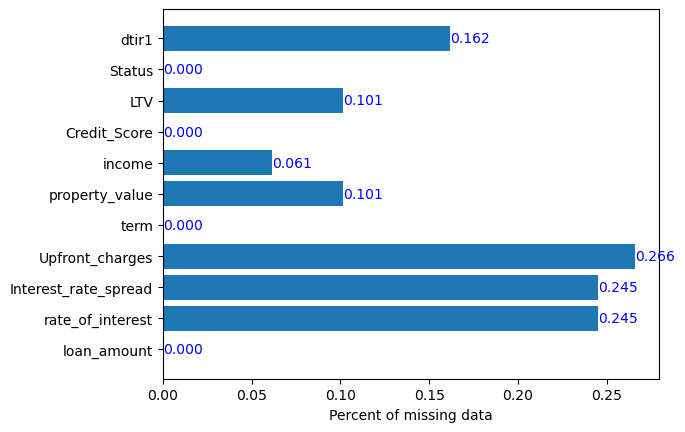

In [475]:
draw_percent_of_missed_data(data_processed[numeric_features])

–ë–æ–ª—å—à–µ –≤—Å–µ–≥–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤ —É –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ dtir1, LTV, propertry_value, Upfront_charges, Interes_rate_spread, rate_of_interest.–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –∫–∞–∫ —ç—Ç–∏ –ø—Ä–æ–ø—É—Å–∫–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π.

In [476]:
def draw_percent_missed_by_target(data, max_skip_features):
    amt_default = data[data['Status'] == 1].shape[0]
    amt_payed = data[data['Status'] == 1].shape[0]
    skipDataByFeatures = {}
    for feature in max_skip_features:
        prcnt_skip_data = data[data['Status'] == 0][feature].isnull().sum() / amt_payed
        skipDataByFeatures[feature] = [prcnt_skip_data]
        
        prcnt_skip_data = data[data['Status'] == 1][feature].isnull().sum() / amt_default
        skipDataByFeatures[feature].append(prcnt_skip_data)
    missedData = pd.DataFrame(skipDataByFeatures.values(), skipDataByFeatures.keys(), columns=['Payed', 'Default'])
    ax = missedData.plot(kind='bar', figsize=(7,4))

    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', padding=3)
    plt.title('Percent of missed data by target')
    plt.show()

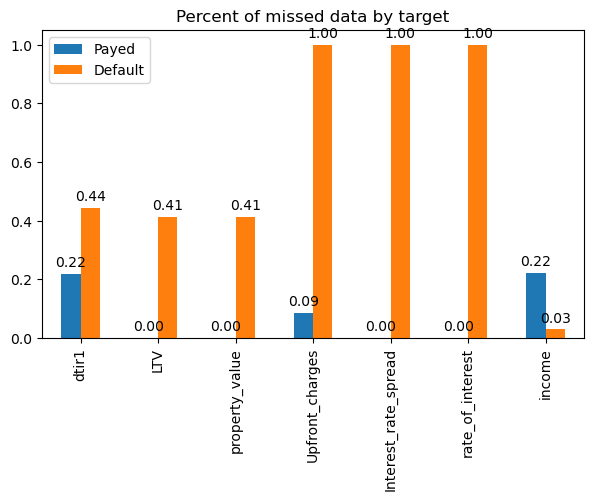

In [477]:
draw_percent_missed_by_target(data_processed[numeric_features], ['dtir1', 'LTV', 'property_value', 'Upfront_charges', 'Interest_rate_spread', 'rate_of_interest', 'income'])

–í—ã–≤–æ–¥—ã:

- –î–ª—è –Ω–µ –≤—ã–ø–æ–ª–æ—á–µ–Ω–Ω—ã—Ö –∫—Ä–µ–¥–∏—Ç–æ–≤ (Default) –ø–æ–ª–Ω–æ—Å—Ç—å—é –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö rate_of_interest, interest_rate_spread, Upfront_charges, –ø—Ä–∏ —ç—Ç–æ–º –≤ –¥–∞–Ω–Ω—ã—Ö –ø–æ —ç—Ç–∏–º –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –¥–ª—è –≤—ã–ø–ª–∞—á–µ–Ω–Ω—ã—Ö –∫—Ä–µ–¥–∏—Ç–æ–≤ –Ω–µ—Ç –ø—Ä–æ–ø—É—Å–∫–æ–≤.
- –î–ª—è –Ω–µ –≤—ã–ø–æ–ª–æ—á–µ–Ω–Ω—ã—Ö –∫—Ä–µ–¥–∏—Ç–æ–≤ (Default) –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö LTV, dtir1 –æ—Ç—Å—É—Ç—Å–≤—É–µ—Ç –ø—Ä–∏–º–µ—Ä–Ω–æ –¥–ª—è 40% –¥–∞–Ω–Ω—ã—Ö.
- –î–ª—è –≤—ã–ø–æ–ª–æ—á–µ–Ω–Ω—ã—Ö –∫—Ä–µ–¥–∏—Ç–æ–≤ —á–∞—Å—Ç–∏—á–Ω–æ –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö LTV, dtir1 –∏ income
- –£ –ø—Ä–∏–∑–Ω–∞–∫–∞ income (–¥–æ—Ö–æ–¥) –∏–Ω–æ–≥–¥–∞ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –∑–Ω–∞—á–µ–Ω–∏—è —Ä–∞–≤–Ω—ã–µ 0, –≤–æ–∑–º–æ–∂–Ω–æ —ç—Ç–æ –æ—à–∏–±–∫–∞ –≤ –¥–∞–Ω–Ω—ã—Ö.

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –∫–æ—Ä–µ–ª–ª—è—Ü–∏–∏ –º–µ–∂–¥—É —á–∏—Å–ª–æ–≤—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏

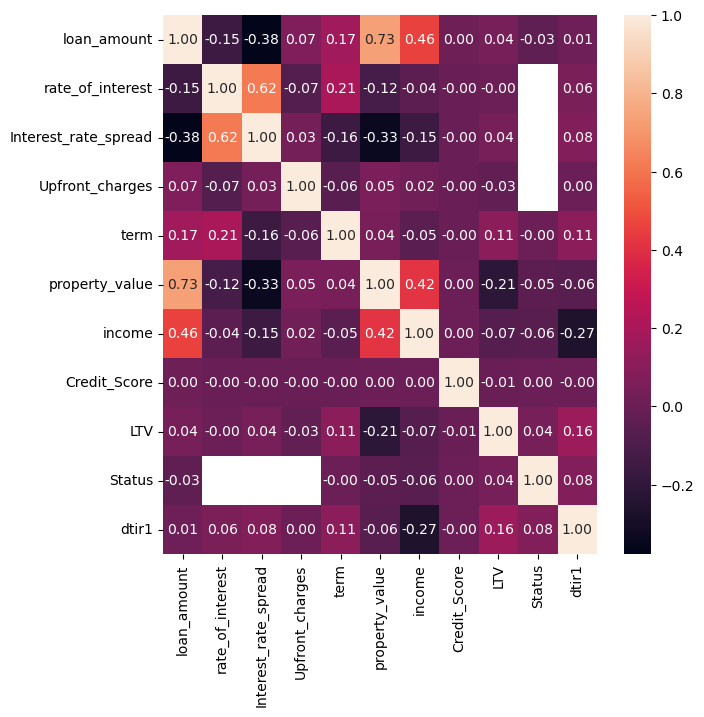

In [478]:
plt.figure(figsize = (7,7))
sns.heatmap(data_processed[numeric_features].corr(),annot=True, fmt='.2f')
plt.show()

–í—ã–≤–æ–¥—ã:
- –°—É—â–µ—Å—Ç–≤—É–µ—Ç —Å–∏–ª—å–Ω–∞—è –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É —Ä–∞–∑–º–µ—Ä–æ–º –∫—Ä–µ–¥–∏—Ç–∞ (loan_amount) –∏ —Ü–µ–Ω–æ–π –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ (property_value). –≠—Ç–æ –ª–æ–≥–∏—á–Ω–æ, –ø–æ—Ç–æ–º—É —á—Ç–æ —Ä–∞–∑–º–µ—Ä –∑–∞—ë–º–∞ –æ–±—ã—á–Ω–æ –ø–æ—á—Ç–∏ —Ä–∞–≤–µ–Ω —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ –¥–ª—è –ø–æ–∫—É–ø–∫–∏ –∫–æ—Ç–æ—Ä–æ–π –æ–Ω –æ—Ñ–æ—Ä–º–ª—è–µ—Ç—Å—è
- –¢–∞–∫–∂–µ —Å–∏–ª—å–Ω–æ –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∞–Ω—ã rate_of_interes –∏ Interest_rate_spread, —ç—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å —Ç–µ–º –∫–∞–∫ –≤—ã—á–∏—Å–ª—è–µ—Ç—Å—è  Interest_rate_spread

## Restore missing data

–í —Å–∏–ª—É —Ç–æ–≥–æ, —á—Ç–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –ø—Ä–∏–∑–Ω–∞–∫–∞—Ö rate_of_interest, interest_rate_spread, Upfront_charges –¥–ª—è –Ω–µ –≤—ã–ø–ª–∞—á–µ–Ω–Ω—ã—Ö –∫—Ä–µ–¥–∏—Ç–æ–≤ –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç –ø–æ–ª–Ω–æ—Å—Ç—å—é –ø–æ–ø—Ä–æ–±—É–µ–º —Å–ª—É–¥–µ—é—â–∏–π –ø–æ–¥—Ö–æ–¥:
- 1) –ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç—å —á—Ç–æ —É –ª—é–¥–µ–π –æ–¥–Ω–æ–≥–æ –≤–æ–∑—Ä–∞—Å—Ç–∞ –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤–∞—è –∫—Ä–µ–¥–∏—Ç–Ω–∞—è –Ω–∞–≥—Ä—É–∑–∫–∞ –∏ –∑–∞—Ä–ø–ª–∞—Ç–∞, –∏ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–∏—Ç—å dtir1 –∏ income —Å—Ä–µ–¥–Ω–∏–º  
- 2) –ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏—Ç—å, —á—Ç–æ —É –∑–¥–∞–Ω–∏–π —Å –æ–¥–∏–Ω–∞–∫–æ–≤—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –∏ –≤–æ—Å—Ç–∞–Ω–æ–≤–∏—Ç—å property_value, –∞ –ø–æ—Ç–æ–º —É–∂–µ –∏ LTV
- 3) –ü–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–∏—Ç—å –ø—Ä–æ–ø—É—Å–∫–∏ –≤ interestRate —Å –ø–æ–º–æ—â—å—é KNN –∏–ª–∏ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–∏—Ç—å –º–µ–¥–∏–∞–Ω–æ–π. **–î–ª—è –≤—Å–µ—Ö –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –¥–æ–±–∞–≤–∏—Ç—å –±–∏–Ω–∞—Ä–Ω—É—é –º–µ—Ç–∫—É –æ —Ç–æ–º, —á—Ç–æ –æ–Ω–∏ –±—ã–ª–∏ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω—ã**. –ü–æ—Ç–æ–º—É —á—Ç–æ –æ—Ç—Å—É—Å—Ç–≤–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ —Ç–æ–∂–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è.
- 4) –£–¥–∞–ª–∏—Ç—å –∫–æ–ª–æ–Ω–∫–∏ upfront_charges (—Å–ª–∞–±–æ–µ —Å–∫–æ—Ä—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω–Ω–∞ —Å —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π),Interest_rate_spread (–ø–æ–ª–Ω–æ—Å—Ç—å—é –ø—É—Å—Ç–∞—è + —Å–∏–ª—å–Ω–æ —Å–∫–æ—Ä–µ–ª–∏—Ä–æ–≤–∞–Ω–∞ —Å interest_rate)

In [479]:
def add_missing_indicator(df, column_name):
    """
    –î–æ–±–∞–≤–ª—è–µ—Ç –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä–Ω—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é –¥–ª—è –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
    0 - –∑–Ω–∞—á–µ–Ω–∏–µ –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç, 1 - –∑–Ω–∞—á–µ–Ω–∏–µ –ø—Ä–æ–ø—É—â–µ–Ω–æ
    """
    indicator_name = f'{column_name}_missing'
    df[indicator_name] = df[column_name].isna().astype(int)
    return df

# –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ

–í—Å–ø–æ–º–Ω–∏–º, —á—Ç–æ —Å—Ä–µ–¥–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞ Income –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è 0 –∑–Ω–∞—á–µ–Ω–∏—è –∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º –∫–∞–∫ —ç—Ç–∏ –ø—Ä–æ–ø—É—Å–∫–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π.

In [480]:
print('Default', data_processed[(data_processed['income'] == 0) & (data_processed['Status'] == 1)]['income'].value_counts())
print('Payed',data_processed[(data_processed['income'] == 0) & (data_processed['Status'] == 0)]['income'].value_counts())

Default income
0.0    1225
Name: count, dtype: int64
Payed income
0.0    8
Name: count, dtype: int64


–ê–±—Å–æ–ª—é—Ç–Ω–æ–µ –±–æ–ª—å—à–µ–Ω—Å—Ç–≤–æ 0 —É –æ–±—ä–µ–∫—Ç–æ–≤ —Å –Ω–µ–≤—ã–ø–ª–∞—á–µ–Ω–Ω—ã–º –∑–∞—ë–º–æ–º. –£—á–∏—Ç—ã–≤–∞—è, —á—Ç–æ –¥–ª—è –Ω–µ –≤—ã–ø–ª–∞—á–µ–Ω–Ω—ã—Ö –∫—Ä–µ–¥–∏—Ç–æ–≤ –±—ã–ª–æ –º–Ω–æ–≥–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤, –±—É–¥–µ–º —Å—á–∏—Ç–∞—Ç—å 0 –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º–∏. 

In [481]:
data_processed['income'] = data_processed['income'].replace(0.0, np.nan)

–î–æ–±–∞–≤–∏–º –∏–Ω–¥–∏–∫–∞—Ç–æ—Ä—ã –¥–ª—è –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π.

In [482]:
missed_features = ['dtir1', 'income', 'property_value', 'LTV', 'rate_of_interest']
for feature in missed_features:
    data_processed = add_missing_indicator(data_processed, feature)

### rate_of_interest

In [483]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
import pandas as pd
import numpy as np

def comprehensive_interest_rate_imputation(df):
    """
    –ö–æ–º–ø–ª–µ–∫—Å–Ω–∞—è –∏–º–ø—É—Ç–∞—Ü–∏—è —Ç–æ–ª—å–∫–æ –¥–ª—è rate_of_interest
    —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Å–≤—è–∑–∞–Ω–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    """
    
    df_processed = df.copy()
    
    # –®–∞–≥ 1: –ü—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–π —Å—Ç–∞–≤–∫–∏
    interest_rate_features = [
        'loan_amount', 'property_value', 'income', 'Credit_Score', 'term',
        'dtir1', 'LTV', 'Region', 'loan_type', 'occupancy_type'
    ]
    
    # –û—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ —Å—É—â–µ—Å—Ç–≤—É—é—â–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
    existing_features = [f for f in interest_rate_features if f in df.columns]
    
    # –î–æ–±–∞–≤–ª—è–µ–º —Ü–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫
    target_features = existing_features + ['rate_of_interest']
    
    # –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö
    imputation_data = df_processed[target_features].copy()
    
    # One-hot encoding –¥–ª—è –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö
    categorical_cols = [f for f in ['Region', 'loan_type', 'occupancy_type'] if f in imputation_data.columns]
    numeric_cols = [f for f in existing_features if f not in categorical_cols]
    
    if categorical_cols:
        dummies = pd.get_dummies(imputation_data[categorical_cols], drop_first=True, dummy_na=True)
        imputation_data = pd.concat([imputation_data[numeric_cols + ['rate_of_interest']], dummies], axis=1)
    
    # –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ
    scaler = StandardScaler()
    imputation_scaled = scaler.fit_transform(imputation_data)
    
    # –í–∞—Ä–∏–∞–Ω—Ç 1: –ò—Ç–µ—Ä–∞—Ç–∏–≤–Ω–∞—è –∏–º–ø—É—Ç–∞—Ü–∏—è (—Ä–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç—Å—è)
    iterative_imputer = IterativeImputer(
        max_iter=15, 
        random_state=42,
        estimator=BayesianRidge()  # –ú–æ–∂–Ω–æ –∑–∞–º–µ–Ω–∏—Ç—å –Ω–∞ RandomForestRegressor(n_estimators=100)
    )
    
    imputed_scaled = iterative_imputer.fit_transform(imputation_scaled)
    
    # –û–±—Ä–∞—Ç–Ω–æ–µ –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ
    imputed_data = scaler.inverse_transform(imputed_scaled)
    
    # –û–±–Ω–æ–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ rate_of_interest
    interest_rate_idx = len(numeric_cols)  # rate_of_interest –≤—Å–µ–≥–¥–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–π
    
    df_processed['rate_of_interest'] = imputed_data[:, interest_rate_idx]
    
    
    # –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –¥–æ –∏ –ø–æ—Å–ª–µ
    original_missing = df['rate_of_interest'].isna().sum()
    original_stats = df['rate_of_interest'].describe()
    imputed_stats = df_processed['rate_of_interest'].describe()
    
    print("‚úÖ –ò–ú–ü–£–¢–ê–¶–ò–Ø rate_of_interest –ó–ê–í–ï–†–®–ï–ù–ê:")
    print(f"   –ó–∞–ø–æ–ª–Ω–µ–Ω–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤: {original_missing}")
    print(f"   –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: {len(existing_features)}")
    print(f"   –î–∏–∞–ø–∞–∑–æ–Ω –¥–æ –∏–º–ø—É—Ç–∞—Ü–∏–∏: {original_stats['min']:.2f}% - {original_stats['max']:.2f}%")
    print(f"   –î–∏–∞–ø–∞–∑–æ–Ω –ø–æ—Å–ª–µ –∏–º–ø—É—Ç–∞—Ü–∏–∏: {imputed_stats['min']:.2f}% - {imputed_stats['max']:.2f}%")
    print(f"   –°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: {imputed_stats['mean']:.2f}%")

    
    return df_processed

In [484]:
data_processed = comprehensive_interest_rate_imputation(data_processed)

‚úÖ –ò–ú–ü–£–¢–ê–¶–ò–Ø rate_of_interest –ó–ê–í–ï–†–®–ï–ù–ê:
   –ó–∞–ø–æ–ª–Ω–µ–Ω–æ –ø—Ä–æ–ø—É—Å–∫–æ–≤: 35270
   –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤: 10
   –î–∏–∞–ø–∞–∑–æ–Ω –¥–æ –∏–º–ø—É—Ç–∞—Ü–∏–∏: 0.00% - 8.00%
   –î–∏–∞–ø–∞–∑–æ–Ω –ø–æ—Å–ª–µ –∏–º–ø—É—Ç–∞—Ü–∏–∏: 0.00% - 8.00%
   –°—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ: 4.04%


### dtir1 and income restoring

In [485]:
meanDtir1ByAge = data_processed.groupby(['age'])['dtir1'].mean().to_dict()
data_processed['dtir1'] = data_processed['dtir1'].fillna(data['age'].map(meanDtir1ByAge))
print(data_processed['dtir1'].isnull().sum())

0


–î–ª—è –∑–∞—Ä–ø–ª–∞—Ç (income) –∏–Ω–æ–≥–¥–∞ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –∑–Ω–∞—á–µ–Ω–∏–µ 0. –û—á–µ–≤–∏–¥–Ω–æ —ç—Ç–æ –æ–ø–µ—á–∞—Ç–∫–∞ –∏–ª–∏ –æ—à–∏–±–∫–∞. 

In [486]:
data_processed['income'] = data_processed['income'].replace(0.0, np.nan)

In [487]:
meanIncomeByAge = data_processed.groupby(['age'])['income'].mean().to_dict()
data_processed['income'] = data_processed['income'].fillna(data['age'].map(meanDtir1ByAge))
print(data_processed['income'].isnull().sum())

0


### LTV and Property_value restoring

In [488]:
similar_building_price = data_processed.groupby(['construction_type', 'occupancy_type', 'total_units', 'Region'])['property_value'].transform('median')
data_processed['property_value'] = data_processed['property_value'].fillna(similar_building_price)

In [489]:
data_processed['LTV'] = data_processed['LTV'].fillna((data_processed['loan_amount'] / data_processed['property_value']) * 100)

### Delete columns with a lot of missed data

In [490]:
data_processed = data_processed.drop(['Interest_rate_spread', 'Upfront_charges'], axis=1)

### term to categorical feature 

–ü—Ä–µ–≤—Ä–∞—Ç–∏–º –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é term –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—É—é, –ø–æ —Å–ª–µ–¥—É—é—â–∏–º –ø—Ä–∏—á–∏–Ω–∞–º: 
- –ú–∞–ª–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π (—Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ 180, 240, 300, 360 –¥–Ω–µ–π –∏ —Ç.–¥.)

- –ù–µ –ª–∏–Ω–µ–π–Ω–∞—è –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å —Å –¥–µ—Ñ–æ–ª—Ç–æ–º (—Ä–∏—Å–∫ –º–æ–∂–µ—Ç –Ω–µ —Ä–∞—Å—Ç–∏ –ª–∏–Ω–µ–π–Ω–æ —Å–æ —Å—Ä–æ–∫–æ–º)

- –ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–∞—è –ø—Ä–∏—Ä–æ–¥–∞ - —ç—Ç–æ –¥–∏—Å–∫—Ä–µ—Ç–Ω—ã–µ "–ø—Ä–æ–¥—É–∫—Ç–æ–≤—ã–µ" –∫–∞—Ç–µ–≥–æ—Ä–∏–∏, –∞ –Ω–µ –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω–∞—è –≤–µ–ª–∏—á–∏–Ω–∞

In [491]:
# –ò–ª–∏ —Å —è–≤–Ω—ã–º —É–∫–∞–∑–∞–Ω–∏–µ–º –≥—Ä–∞–Ω–∏—Ü
data_processed['term'] = pd.cut(data_processed['term'],
                            bins=[0, 120, 250, 500],
                            labels=['short', 'medium', 'long'])

## Filtering data

### Numeric features

In [503]:
data_clean = data_processed
numeric_features = ['loan_amount','rate_of_interest','property_value','income','Credit_Score','LTV','dtir1']

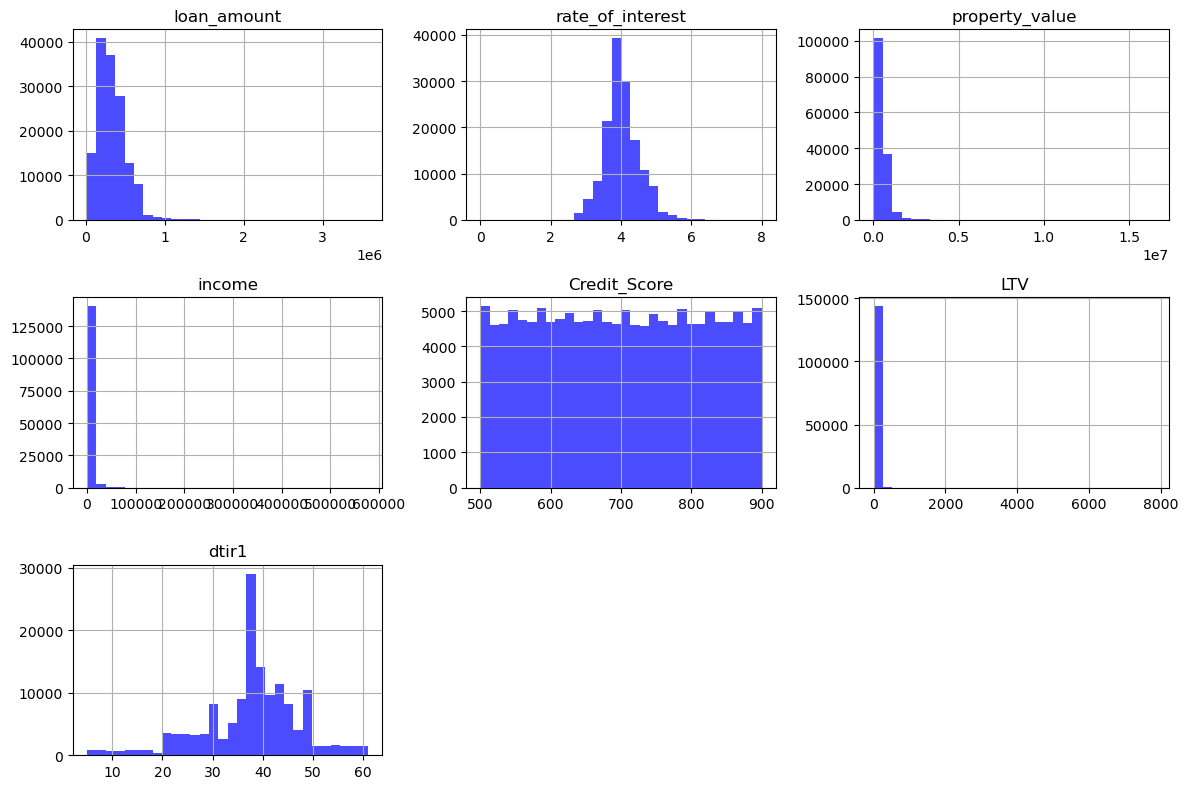

In [504]:
ax = data_clean[numeric_features].hist(figsize=(12, 8), bins=30, alpha=0.7, color='blue')
plt.tight_layout()
plt.show()

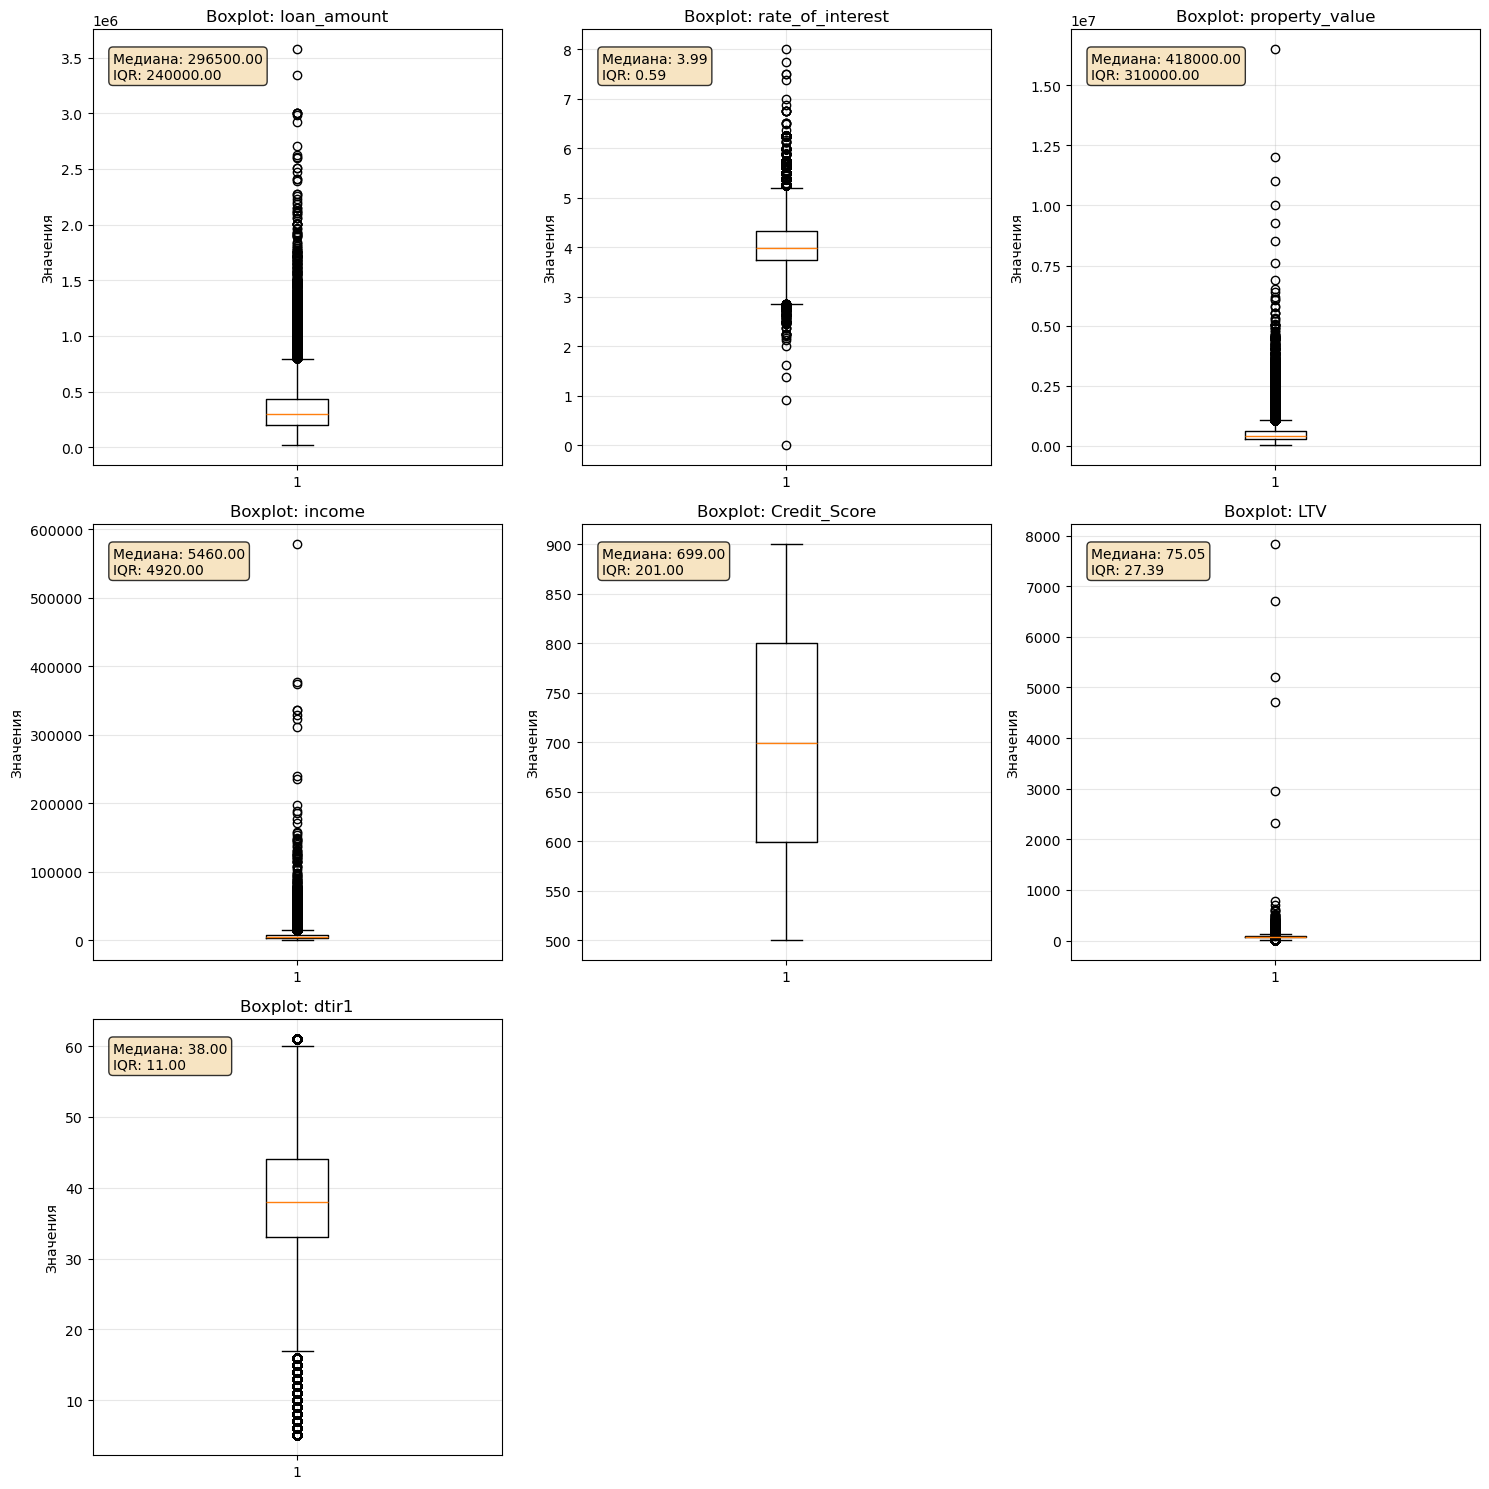

In [506]:
# –°–æ–∑–¥–∞–µ–º —Å–µ—Ç–∫—É –≥—Ä–∞—Ñ–∏–∫–æ–≤
def draw_boxPlots(data, features):
    data = data[features]
    n_cols = 3
    n_rows = (len(features) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes]

    for i, col in enumerate(features):
        # –í–µ—Ä—Ç–∏–∫–∞–ª—å–Ω—ã–π boxplot
        axes[i].boxplot(data[col].dropna(), vert=True)
        axes[i].set_title(f'Boxplot: {col}')
        axes[i].set_ylabel('–ó–Ω–∞—á–µ–Ω–∏—è')
        axes[i].grid(True, alpha=0.3)
        
        # –î–æ–±–∞–≤–ª—è–µ–º –æ—Å–Ω–æ–≤–Ω—ã–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏
        stats = data[col].describe()
        axes[i].text(0.05, 0.95, f'–ú–µ–¥–∏–∞–Ω–∞: {stats["50%"]:.2f}\n'
                                f'IQR: {stats["75%"]-stats["25%"]:.2f}', 
                    transform=axes[i].transAxes, verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    # –°–∫—Ä—ã–≤–∞–µ–º –ø—É—Å—Ç—ã–µ subplots
    for i in range(len(features), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()
draw_boxPlots(data_processed, numeric_features)

–ü–æ –≥—Ä–∞—Ñ–∏–∫–∞–º –∑–∞–º–µ—Ç–Ω–æ, —á—Ç–æ —É –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ LTV, property_value, income –µ—Å—Ç—å –±–æ–ª—å—à–∏–µ –≤—ã–±—Ä–æ—Å—ã. –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ boxplot

–û—Ç—Ñ–∏–ª—å—Ç—Ä—É–µ–º –≤—ã–±—Ä–æ—Å—ã –ø–æ —Ä–∏–∑–Ω–∞–∫–∞–º loan_amount, propertry_value, income, LTV.

In [514]:
check_features = ['loan_amount', 'property_value', 'income', 'LTV']
quantiles = {}
for feature in check_features:
    quantiles[feature] = (data_clean[feature].quantile(0.02),  data_clean[feature].quantile(0.98))

In [515]:
quantiles

{'loan_amount': (np.float64(76500.0), np.float64(726500.0)),
 'property_value': (np.float64(118000.0), np.float64(1408000.0)),
 'income': (np.float64(37.23488883095602), np.float64(20421.59999999916)),
 'LTV': (np.float64(23.61325116), np.float64(113.9367816091954))}

In [516]:
for feature, q in quantiles.items():
    print(feature, data_clean[(data_clean[feature] > q[0]) & (data_clean[feature] < q[1])].shape[0] /data_clean.shape[0])

loan_amount 0.9482994520186411
property_value 0.9558906259766778
income 0.950744185077405
LTV 0.9599674961627415


In [517]:
for feature, q in quantiles.items():
    data_clean = data_clean[(data_clean[feature] > q[0]) & (data_clean[feature] < q[1])]
    

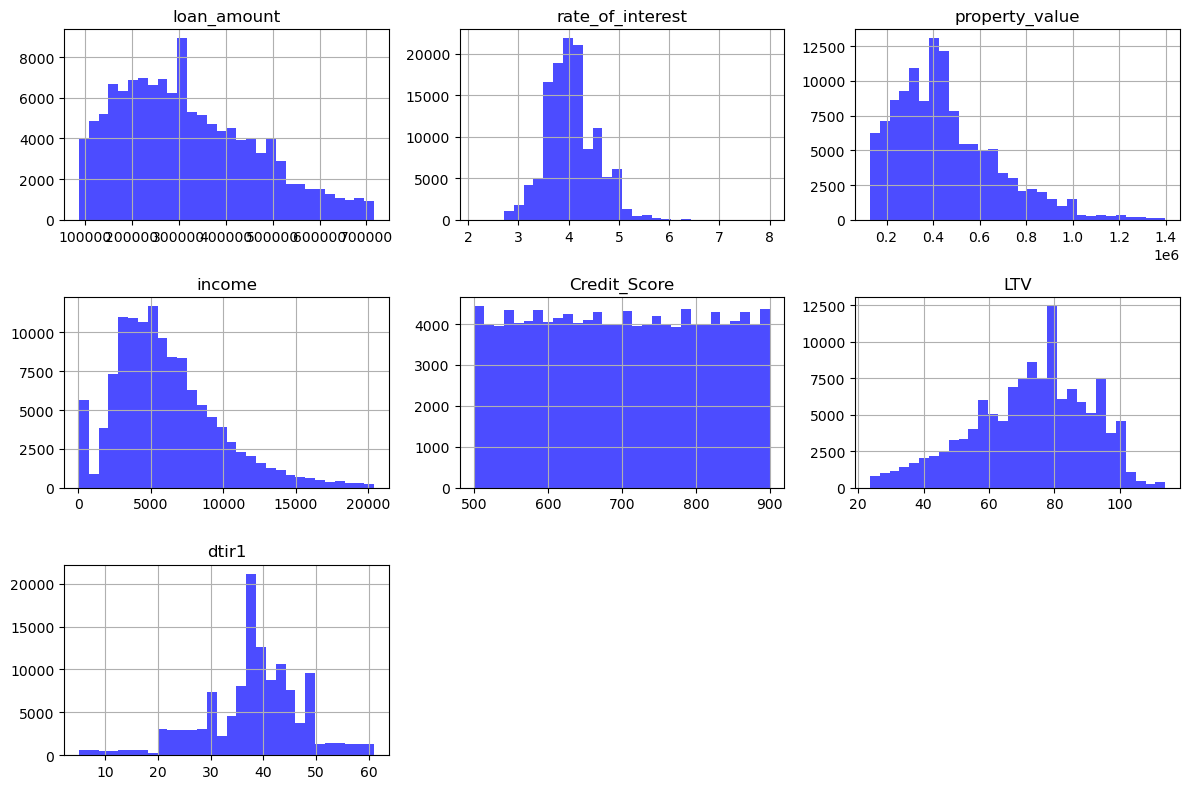

In [518]:
ax = data_clean[numeric_features].hist(figsize=(12, 8), bins=30, alpha=0.7, color='blue')
plt.tight_layout()
plt.show()

### Categorical features

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏. –ú–æ–∂–µ—Ç —Å—Ä–µ–¥–∏ –Ω–∏—Ö –µ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏ –∫–æ—Ç–æ—Ä—ã–µ –ø–æ—á—Ç–∏ —Ü–µ–ª–∏–∫–æ–º —Å–æ—Å—Ç–æ—è–∏—Ç –∏–∑ –æ–¥–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è

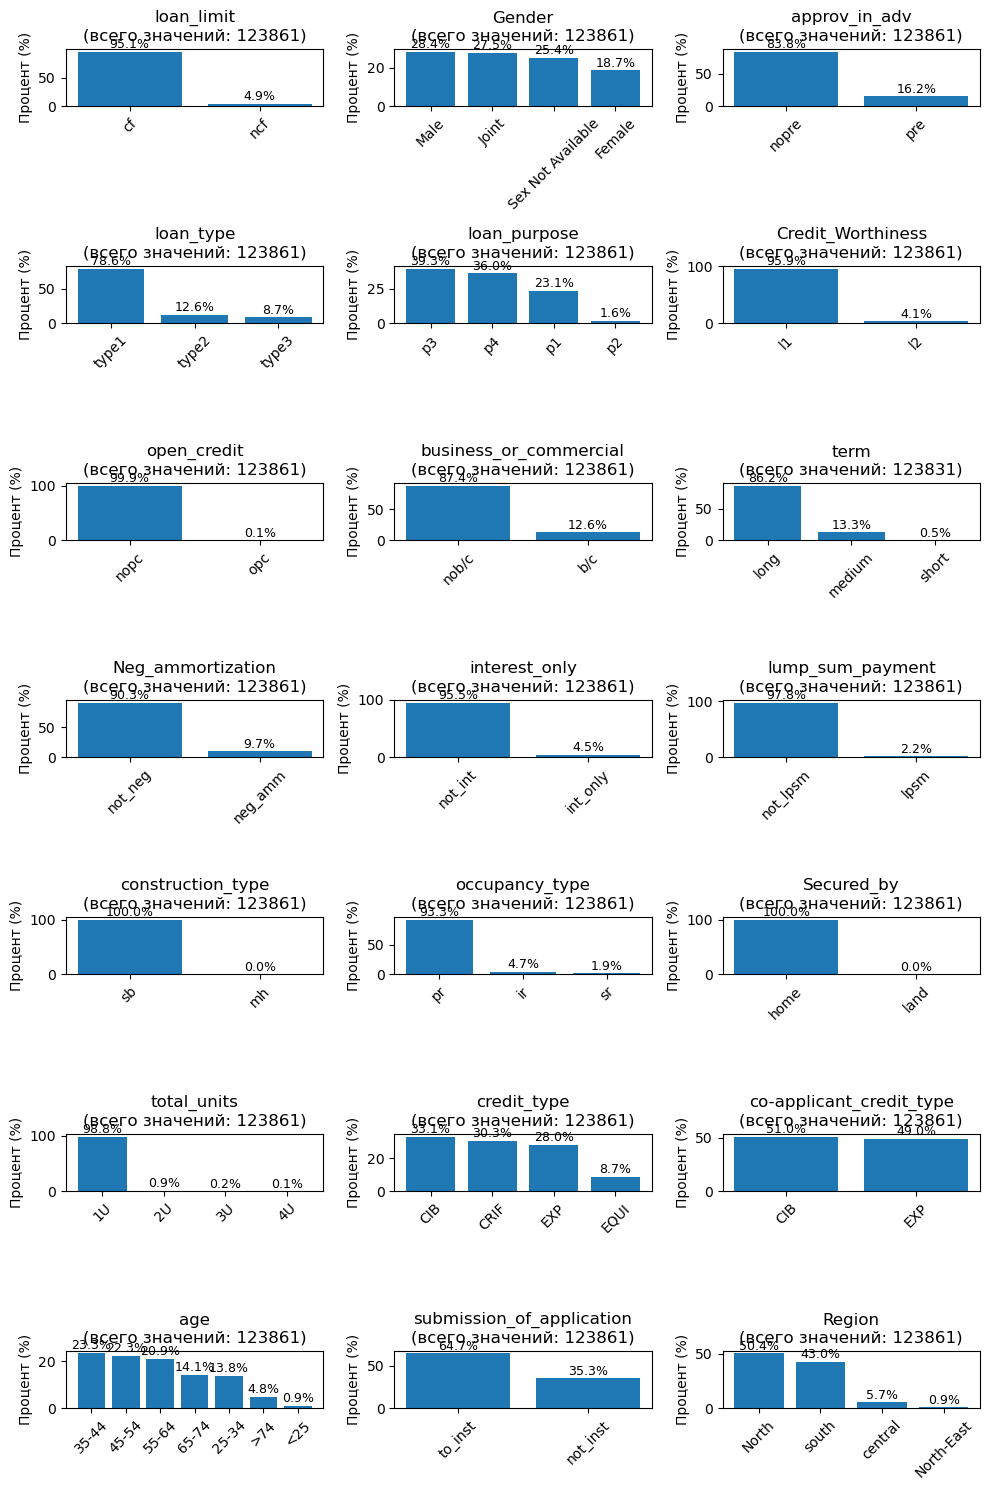

In [523]:
def plot_categorical_percentages(df, figsize=(10, 15)):
    """
    –°—Ç—Ä–æ–∏—Ç –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã —Å –ø—Ä–æ—Ü–µ–Ω—Ç–Ω—ã–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ–º –¥–ª—è –≤—Å–µ—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    """
    # –í—ã–±–∏—Ä–∞–µ–º —Ç–æ–ª—å–∫–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –∫–æ–ª–æ–Ω–∫–∏
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    
    n_cols = len(categorical_columns)
    if n_cols == 0:
        print("–ù–µ—Ç –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–µ")
        return
    
    # –í—ã—á–∏—Å–ª—è–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç—Ä–æ–∫ –∏ —Å—Ç–æ–ª–±—Ü–æ–≤ –¥–ª—è subplot
    n_rows = (n_cols + 2) // 3  # –º–∞–∫—Å–∏–º—É–º 3 –≥—Ä–∞—Ñ–∏–∫–∞ –≤ —Å—Ç—Ä–æ–∫–µ
    fig, axes = plt.subplots(n_rows, 3, figsize=figsize)
    axes = axes.flatten() if n_rows > 1 else [axes]  # –≤—ã—Ä–∞–≤–Ω–∏–≤–∞–µ–º –æ—Å–∏
    
    for i, col in enumerate(categorical_columns):
        if i < len(axes):
            # –°—á–∏—Ç–∞–µ–º –ø—Ä–æ—Ü–µ–Ω—Ç—ã
            value_counts = df[col].value_counts(normalize=True) * 100
            
            # –°—Ç—Ä–æ–∏–º –±–∞—Ä–ø–ª–æ—Ç
            bars = axes[i].bar(value_counts.index.astype(str), value_counts.values)
            axes[i].set_title(f'{col}\n(–≤—Å–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏–π: {len(df[col].dropna())})')
            axes[i].set_ylabel('–ü—Ä–æ—Ü–µ–Ω—Ç (%)')
            axes[i].tick_params(axis='x', rotation=45)
            
            # –î–æ–±–∞–≤–ª—è–µ–º –ø–æ–¥–ø–∏—Å–∏ –∑–Ω–∞—á–µ–Ω–∏–π –Ω–∞ —Å—Ç–æ–ª–±—Ü—ã
            for bar, value in zip(bars, value_counts.values):
                height = bar.get_height()
                axes[i].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                           f'{value:.1f}%', ha='center', va='bottom', fontsize=9)
            
            # –û–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–æ–±—Ä–∞–∂–∞–µ–º—ã—Ö –∫–∞—Ç–µ–≥–æ—Ä–∏–π –¥–ª—è —á–∏—Ç–∞–µ–º–æ—Å—Ç–∏
            if len(value_counts) > 10:
                axes[i].set_title(f'{col}\n(–ø–µ—Ä–≤—ã–µ 10 –∏–∑ {len(value_counts)} –∫–∞—Ç–µ–≥–æ—Ä–∏–π)')
    
    # –°–∫—Ä—ã–≤–∞–µ–º –ø—É—Å—Ç—ã–µ subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ
plot_categorical_percentages(data_clean)

–ü—Ä–∏–∑–Ω–∞–∫–∏ total units, construction_type, occupance type —Ü–µ–ª–∏–∫–æ–º —Å–æ—Å—Ç–æ—è—Ç –∏–∑ –æ–¥–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è, –∫ —Ç–æ–º—É –∂–µ –æ–Ω–∏ –º–∞–ª–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ç–∏–≤–Ω—ã —É–¥–∞–ª–∏–º –∏—Ö –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞.

In [ ]:
data_clean.occupancy_type

In [528]:
data_clean = data_clean.drop(['total_units','construction_type', 'occupancy_type'], axis=1)

### Save data

–°–æ—Ö—Ä–∞–Ω–∏–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ

In [693]:
data_clean.to_csv('Data/privilege_clean_data.csv', index=False)

–¢–∞–∫–∂–µ —Å–æ—Ö—Ä–∞–Ω–∏–º –¥–∞–Ω–Ω—ã–µ –±–µ–∑ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –æ –ø—Ä–æ–ø—É—Å–∫–∞—Ö. –ú–æ–¥–µ–ª–∏ –º–æ–≥—É—Ç –ø–µ—Ä–µ–æ–±—É—á–∞—Ç—å—Å—è –∏–∑-–∑–∞ –Ω–∞–ª–∏—á–∏—è —ç—Ç–æ–π –ø—Ä–∏–≤–∏–ª–∏–≥–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏.

In [694]:
column_names = data_clean.columns.to_list()
missing_indicators = [col for col in column_names if col.endswith('missing')]
missing_indicators

['dtir1_missing',
 'income_missing',
 'property_value_missing',
 'LTV_missing',
 'rate_of_interest_missing']

In [695]:
data_clean = data_clean.drop(missing_indicators, axis=1)

In [696]:
data_clean.to_csv('Data/clean_data_no_extra_info.csv', index=False)

# 3. EDA

In [530]:
data_clean = pd.read_csv('Data\clean_data.csv')

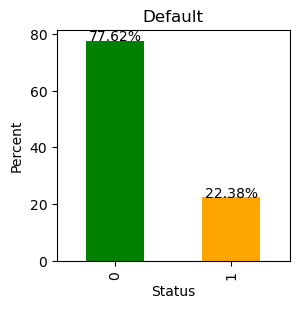

In [531]:
draw_target_percents(data_clean)

–ü—Ä–∏—Å—É—Ç—Å–≤—É–µ—Ç —Å–∏–ª—å–Ω—ã–π –¥–∏—Å–±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤

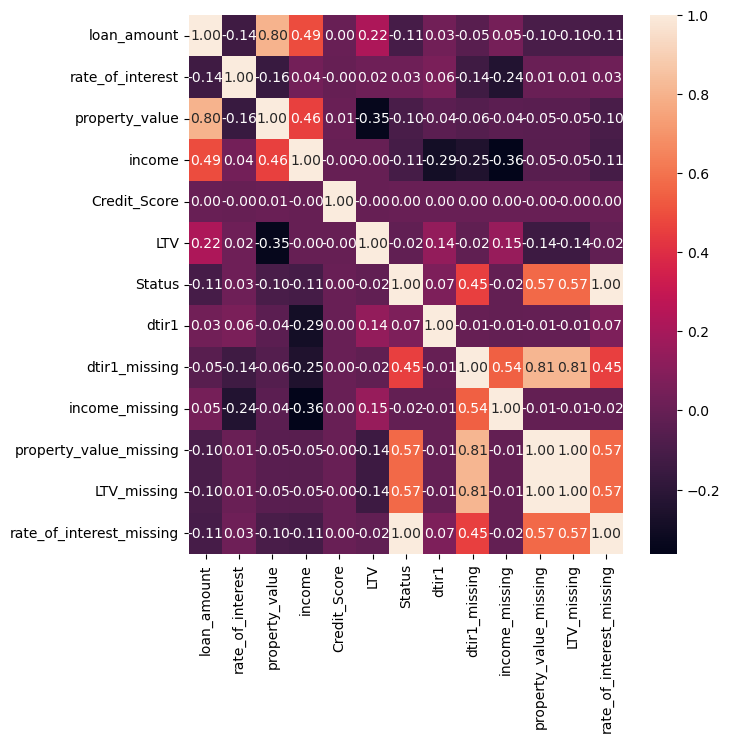

In [539]:
continuos_numeric_features = data_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
plt.figure(figsize = (7,7))
sns.heatmap(data_clean[continuos_numeric_features].corr(),annot=True, fmt='.2f')
plt.show()

**–í—ã–≤–æ–¥—ã:**
 - –°—É—â–µ—Å—Ç–≤—É–µ—Ç –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É —Ä–∞–∑–º–µ—Ä–æ–º –∫—Ä–µ–¥–∏—Ç–∞ (loan_amount) –∏ —Ü–µ–Ω–æ–π –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ (property_value). –≠—Ç–æ –ª–æ–≥–∏—á–Ω–æ, –ø–æ—Ç–æ–º—É —á—Ç–æ —Ä–∞–∑–º–µ—Ä –∑–∞—ë–º–∞ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç —Å—Ç–æ–∏–º–æ—Å—Ç–∏ –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ –¥–ª—è –ø–æ–∫—É–ø–∫–∏ –∫–æ—Ç–æ—Ä–æ–π –æ–Ω –æ—Ñ–æ—Ä–º–ª—è–µ—Ç—Å—è
 - –¢–∞–∫ –∂–µ –≤–∑–∞–∏–º–æ—Å–≤—è–∑–∞–Ω—ã –¥–æ—Ö–æ–¥ (income), —Ä–∞–∑–º–µ—Ä –∫—Ä–µ–¥–∏—Ç–∞ (loan_amount) –∏ —Å—Ç–æ–∏–º–æ—Å—Ç—å –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ (property_value)
 - LTV –∫–æ—Ä—Ä–µ–ª–∏—Ä—É–µ—Ç —Å–æ —Å—Ç–æ–∏–º–æ—Å—Ç—å—é –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ (property value). –≠—Ç–æ –æ–±—ä—è—Å–Ω—è–µ—Ç—Å—è —Ç–µ–º, –∫–∞–∫ –≤—ã—á–∏—Å–ª—è–µ—Ç—Å—è LTV. 
 - –ó–Ω–∞–Ω–∏–µ –æ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Å–∏–ª—å–Ω–æ –≤–ª–∏—è–µ—Ç –Ω–∞ —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é


## 2.1 Hypotheses

- 1. –ó–∞—ë–º—â–∏–∫–∏ —Å –≤—ã—Å–æ–∫–∏–º –∫—Ä–µ–¥–∏—Ç–Ω—ã–º —Ä–µ–π—Ç–∏–Ω–≥–æ–º —á–∞—â–µ –≤–æ–∑–≤—Ä–∞—â–∞—é—Ç –∫—Ä–µ–¥–∏—Ç—ã
- 2. –ö—Ä—É–ø–Ω—ã–µ –∫—Ä–µ–¥–∏—Ç—ã –≤–æ–∑–≤—Ä–∞—â–∞—é—Ç —á–∞—â–µ
- 3. –õ—é–¥–∏ –∫–æ—Ç–æ—Ä—ã–µ –≤—ã–ø–ª–∞—Ç–∏–ª–∏ –∫—Ä–µ–¥–∏—Ç –∑–∞—Ä–∞–±–∞—Ç—ã–≤–∞—é—Ç –±–æ–ª—å—à–µ –≤–Ω–µ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –ø–æ–ª–∞
- 4. –ì–µ–Ω–¥–µ—Ä –∑–∞—ë–º—â–∏–∫–∞ –Ω–µ –≤–ª–∏—è–µ—Ç –Ω–∞ –≤—ã–ø–ª–∞—Ç—É  –∫—Ä–µ–¥–∏—Ç–∞
- 5. –ö—Ä–µ–¥–∏—Ç—ã —Å –±–æ–ª—å—à–∏–º —Å—Ä–æ–∫–æ–º —á–∞—â–µ –≤–æ–∑–≤—Ä–∞—â–∞—é—Ç
- 6. –¶–µ–ª—å –∫—Ä–µ–¥–∏—Ç–∞ –Ω–µ –≤–ª–∏—è–µ—Ç –Ω–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –µ–≥–æ –≤–æ–∑–≤—Ä–∞—Ç–∞
- 7. –ö–æ–º–º–µ—Ä—á–µ—Å–∫–∏–µ –∫—Ä–µ–¥–∏—Ç—ã –≤–æ–∑–≤—Ä–∞—â–∞—é—Ç —á–∞—â–µ
- 8. –ö—Ä–µ–¥–∏—Ç—ã –∫–æ—Ç–æ—Ä—ã–µ —Ç—Ä–µ–±—É—é—Ç –µ–¥–∏–Ω–æ–≤—Ä–µ–º–µ–Ω–Ω–æ–π –æ–ø–ª–∞—Ç—ã –ø–æ –∏—Å—Ç–∏—á–µ–Ω–∏—é —Å—Ä–æ–∫–∞, –≤–æ–∑–≤—Ä–∞—â–∞—é—Ç —Ä–µ–∂–µ
- 9. –ü—Ä–µ–¥–æ–¥–æ–±—Ä–µ–Ω–Ω—ã–µ –∫—Ä–µ–¥–∏—Ç—ã —á–∞—â–µ –≤–æ–∑–≤—Ä–∞—â–∞—é—Ç
- 10. –ö—Ä–µ–¥–∏—Ç—ã —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–∏ –ª–∏–º–∏—Ç–∞ —á–∞—â–µ –≤–æ–∑–≤—Ä–∞—â–∞—é—Ç
- 11. –ó–∞—ë–º—â–∏–∫–∏ —Å –≤—ã—Å–æ–∫–æ–π –∫—Ä–µ–¥–∏—Ç–æ—Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å—é —á–∞—â–µ –≤–æ–∑–≤—Ä–∞—â–∞—é—Ç –∫—Ä–µ–¥–∏—Ç—ã
- 12. –í–∑—Ä–æ—Å–ª—ã–µ –ª—é–¥–∏ —á–∞—â–µ –≤–æ–∑–≤—Ä–∞—â–∞—é—Ç –∫—Ä–µ–¥–∏—Ç—ã, —á–µ–º –±–æ–ª–µ–µ –º–æ–ª–æ–¥—ã–µ
- 13. –ó–∞—ë–º—â–∏–∫–∏ —Å –Ω–∏–∑–∫–∏–º dtir1 (–º–µ–Ω—å—à–µ–π –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –Ω–∞–≥—Ä—É–∑–∫–æ–π) —á–∞—â–µ –≤–æ–∑–≤—Ä–∞—â–∞—é—Ç –¥–æ–ª–≥
- 14. Region –Ω–µ –≤–ª–∏—è–µ—Ç –Ω–∞ –¥–µ—Ñ–æ–ª—Ç.
- 15. –¢–∏–ø –∫—Ä–µ–¥–∏—Ç–∞ –≤–ª–∏—è–µ—Ç –Ω–∞ —Ç–æ –≤–µ—Ä–Ω—É—Ç—å –µ–≥–æ –∏–ª–∏ –Ω–µ—Ç

### –ì–∏–ø–æ—Ç–µ–∑–∞ 1. –ó–∞—ë–º—â–∏–∫–∏ —Å –≤—ã—Å–æ–∫–∏–º –∫—Ä–µ–¥–∏—Ç–Ω—ã–º —Ä–µ–π—Ç–∏–Ω–≥–æ–º —á–∞—â–µ –≤–æ–∑–≤—Ä–∞—â–∞—é—Ç –∫—Ä–µ–¥–∏—Ç—ã

In [533]:
def plot_feature_by_target(df, feature, target='Status'):
    """–£–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞ –ø–æ –±–∏–Ω–∞—Ä–Ω–æ–π —Ü–µ–ª–∏"""
    
    fig, axes = plt.subplots(1, 2, figsize=(8,5))
    
    
    
    # 3. Boxplot
    sns.boxplot(data=df, x=target, y=feature, ax=axes[0],palette=['lightblue', 'salmon'])
    axes[0].set_title(f'Boxplot {feature} –ø–æ {target}')
    
    # 4. Violin plot
    sns.violinplot(data=df, x=target, y=feature, ax=axes[1])
    axes[1].set_title(f'Violin plot {feature} –ø–æ {target}')
    
    plt.tight_layout()
    plt.show()
    
    # –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞
    print(f"\n–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ {feature} –ø–æ {target}:")
    print(df.groupby(target)[feature].describe())

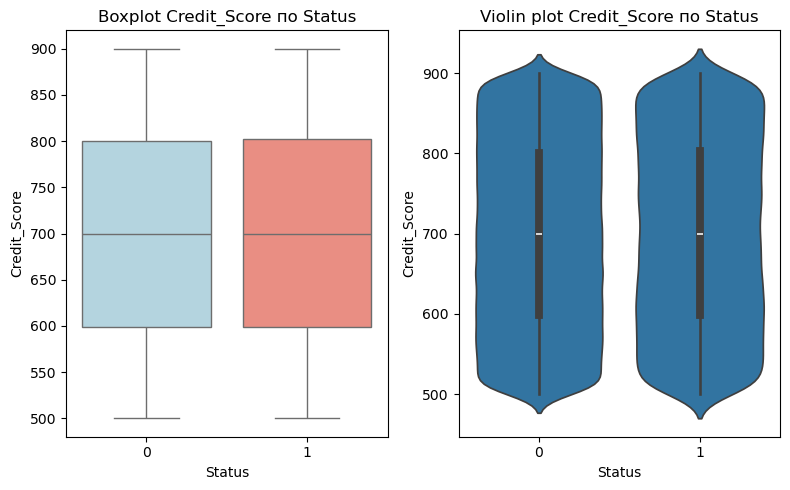


–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ Credit_Score –ø–æ Status:
          count        mean         std    min    25%    50%     75%    max
Status                                                                     
0       96147.0  699.530771  115.699587  500.0  599.0  699.0  800.00  900.0
1       27714.0  700.180198  116.676104  500.0  599.0  700.0  802.75  900.0


In [534]:
plot_feature_by_target(data_clean, 'Credit_Score', 'Status')

–ì–∏–ø–æ—Ç–µ–∑–∞ –Ω–µ –æ–ø—Ä–∞–≤–¥–∞–ª–∞—Å—å.–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ—á—Ç–∏ –ø–æ–ª–Ω–æ—Å—Ç—å—é —Å–æ–≤–ø–∞–ª–∏.

### –ì–∏–ø–æ—Ç–µ–∑–∞ 2. –ö—Ä—É–ø–Ω—ã–µ –∫—Ä–µ–¥–∏—Ç—ã –≤–æ–∑–≤—Ä–∞—â–∞—é—Ç —á–∞—â–µ. 

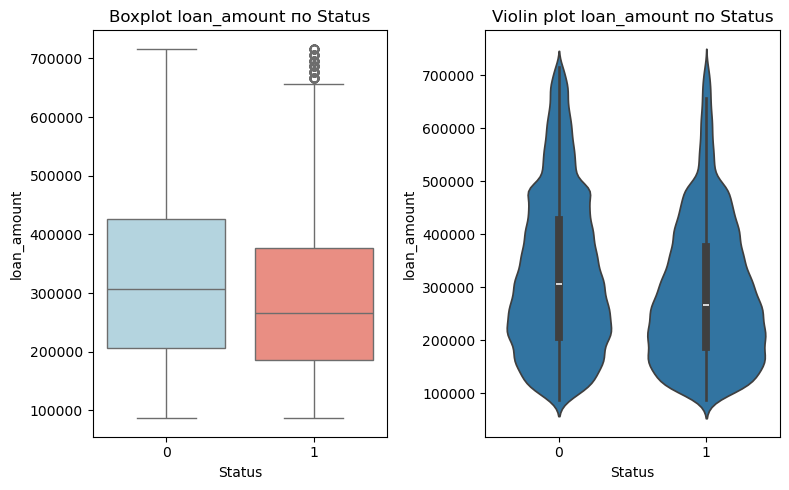


–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ loan_amount –ø–æ Status:
          count           mean            std      min       25%       50%  \
Status                                                                       
0       96147.0  327327.586924  148002.974926  86500.0  206500.0  306500.0   
1       27714.0  289625.496139  130859.206702  86500.0  186500.0  266500.0   

             75%       max  
Status                      
0       426500.0  716500.0  
1       376500.0  716500.0  


In [535]:
plot_feature_by_target(data_clean, 'loan_amount', 'Status')

–ì–∏–ø–æ—Ç–µ–∑–∞ –æ—Ç—á–∞—Å—Ç–∏ –ø–æ–¥—Ç–≤–µ—Ä–¥–∏–ª–∞—Å—å. –ì—Ä–∞—Ñ–∏–∫ —É –≤—ã–ø–ª–∞—á–µ–Ω–Ω—ã—Ö –∫—Ä–µ–¥–∏—Ç–æ–≤ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è —á—É—Ç—å –≤—ã—à–µ. –¢–∞–∫ –∂–µ –Ω–µ —Å—Ç–æ–∏—Ç –∑–∞–±—ã–≤–∞—Ç—å, —á—Ç–æ —ç—Ç–æ –≥—Ä–∞—Ñ–∏–∫–∏ —É–∂–µ –¥–ª—è –ª–æ–≥–æ—Ä–∏—Ñ–º–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –≤–µ–ª–∏—á–∏–Ω—ã, –∞ –∑–Ω–∞—á–∏—Ç –¥–ª—è –∏—Å—Ö–æ–¥–Ω—ã—Ö –≤–µ–ª–∏—á–∏–Ω —Ä–∞–∑–Ω–∏—Ü–∞ –µ—â–µ –∑–∞–º–µ—Ç–Ω–µ–µ.

### –ì–∏–ø–æ—Ç–µ–∑–∞ 3. –õ—é–¥–∏ –∫–æ—Ç–æ—Ä—ã–µ –≤—ã–ø–ª–∞—Ç–∏–ª–∏ –∫—Ä–µ–¥–∏—Ç –∑–∞—Ä–∞–±–∞—Ç—ã–≤–∞—é—Ç –±–æ–ª—å—à–µ –≤–Ω–µ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –ø–æ–ª–∞

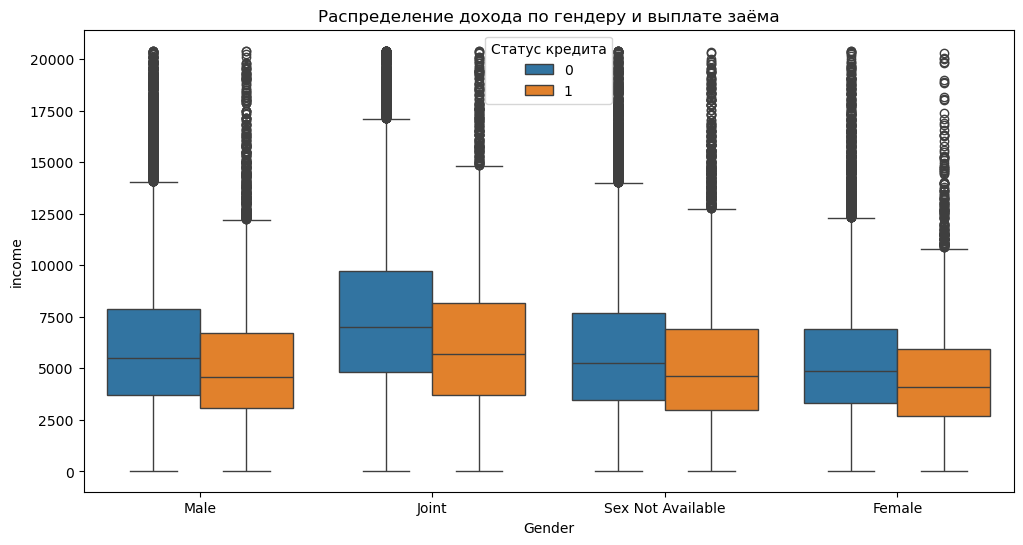

In [536]:
# –ü—Ä–∏–º–µ—Ä: —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–æ—Ö–æ–¥–∞ –ø–æ —Ä–µ–≥–∏–æ–Ω—É, —Å —Ä–∞–∑–±–∏–≤–∫–æ–π –ø–æ —Å—Ç–∞—Ç—É—Å—É –∫—Ä–µ–¥–∏—Ç–∞
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_clean, x='Gender', y='income', hue='Status')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–æ—Ö–æ–¥–∞ –ø–æ –≥–µ–Ω–¥–µ—Ä—É –∏ –≤—ã–ø–ª–∞—Ç–µ –∑–∞—ë–º–∞')
plt.legend(title='–°—Ç–∞—Ç—É—Å –∫—Ä–µ–¥–∏—Ç–∞')
plt.show()

–î–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –∑–∞—ë–º—â–∏–∫–∏ –≤—ã–ø–ª–∞—Ç–∏–≤—à–∏–µ –∫—Ä–µ–¥–∏—Ç –∏–º–µ—é—Ç –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–µ –∑–∞—Ä–ø–ª–∞—Ç—ã.

### –ì–∏–ø–æ—Ç–µ–∑–∞ 4. –ì–µ–Ω–¥–µ—Ä –∑–∞—ë–º—â–∏–∫–∞ –Ω–µ –≤–ª–∏—è–µ—Ç –Ω–∞ –≤—ã–ø–ª–∞—Ç—É  –∫—Ä–µ–¥–∏—Ç–∞

<Figure size 1000x600 with 0 Axes>

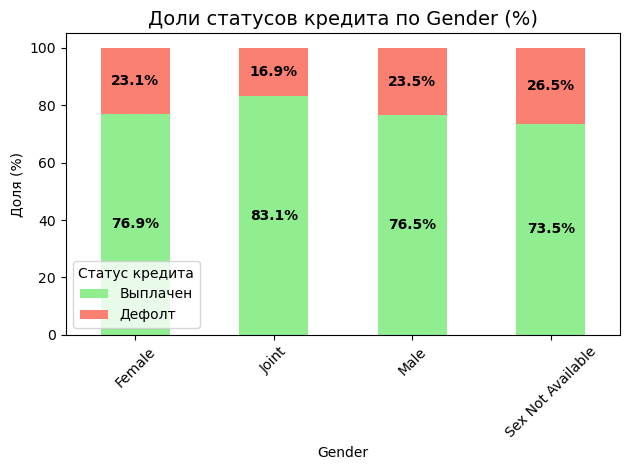

–¢–∞–±–ª–∏—Ü–∞ –¥–æ–ª–µ–π –ø–æ Gender (%):
                   –í—ã–ø–ª–∞—á–µ–Ω  –î–µ—Ñ–æ–ª—Ç
Gender                             
Female                 76.9    23.1
Joint                  83.1    16.9
Male                   76.5    23.5
Sex Not Available      73.5    26.5



In [537]:
def plot_category_percentages(df, category_col, target_col='Status'):
    # –°—á–∏—Ç–∞–µ–º –¥–æ–ª–∏
    category_pct = df.groupby(category_col)[target_col].value_counts(normalize=True).unstack() * 100
    category_pct.columns = ['–í—ã–ø–ª–∞—á–µ–Ω', '–î–µ—Ñ–æ–ª—Ç']
    
    # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
    plt.figure(figsize=(10, 6))
    ax = category_pct.plot(kind='bar', stacked=True, 
                          color=['lightgreen', 'salmon'])
    
    plt.title(f'–î–æ–ª–∏ —Å—Ç–∞—Ç—É—Å–æ–≤ –∫—Ä–µ–¥–∏—Ç–∞ –ø–æ {category_col} (%)', fontsize=14)
    plt.xlabel(category_col)
    plt.ylabel('–î–æ–ª—è (%)')
    plt.legend(title='–°—Ç–∞—Ç—É—Å –∫—Ä–µ–¥–∏—Ç–∞')
    plt.xticks(rotation=45)
    
    # –î–æ–±–∞–≤–ª—è–µ–º –ø—Ä–æ—Ü–µ–Ω—Ç—ã –Ω–∞ –∫–∞–∂–¥—ã–π —Å–µ–≥–º–µ–Ω—Ç
    for i, (category, row) in enumerate(category_pct.iterrows()):
        cumulative = 0
        for status, pct in row.items():
            if pct > 0:  # —Ç–æ–ª—å–∫–æ –µ—Å–ª–∏ –¥–æ–ª—è > 0%
                ax.text(i, cumulative + pct/2, f'{pct:.1f}%', 
                       ha='center', va='center', fontweight='bold', fontsize=10)
            cumulative += pct
    
    plt.tight_layout()
    plt.show()
    
    print(f"–¢–∞–±–ª–∏—Ü–∞ –¥–æ–ª–µ–π –ø–æ {category_col} (%):")
    print(category_pct.round(1))
    print("\n" + "="*50)
    
    return category_pct

# –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ
gender_summary = plot_category_percentages(data_clean, 'Gender')

–î–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –≥–µ–Ω–¥–µ—Ä –Ω–µ –∏–º–µ–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è, –∞ –∑–Ω–∞—á–∏—Ç —ç—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫ –º–æ–∂–Ω–æ –±—É–¥–µ—Ç —É–±—Ä–∞—Ç—å –∏–∑ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω–∏—è.

### –ì–∏–ø–æ—Ç–µ–∑–∞ 5. –ö—Ä–µ–¥–∏—Ç—ã —Å –±–æ–ª—å—à–∏–º —Å—Ä–æ–∫–æ–º —á–∞—â–µ –≤–æ–∑–≤—Ä–∞—â–∞—é—Ç

<Figure size 1000x600 with 0 Axes>

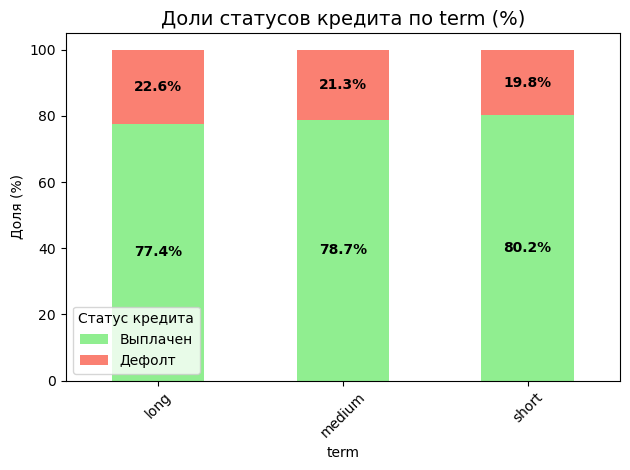

–¢–∞–±–ª–∏—Ü–∞ –¥–æ–ª–µ–π –ø–æ term (%):
        –í—ã–ø–ª–∞—á–µ–Ω  –î–µ—Ñ–æ–ª—Ç
term                    
long        77.4    22.6
medium      78.7    21.3
short       80.2    19.8



In [594]:
term_summary = plot_category_percentages(data_clean, 'term')

–ì–∏–ø–æ—Ç–µ–∑–∞ –Ω–µ –ø–æ–¥—Ç–≤–µ—Ä–¥–∏–ª–∞—Å—å. –û–∫–∞–∑–∞–ª–æ—Å—å —á—Ç–æ —á–∞—â–µ –≤–æ–∑–≤—Ä–∞—â–∞—é—Ç –∑–∞—ë–º—ã —Å —Å–∞–º—ã–º –∫–æ—Ä–æ—Ç–∫–∏–º —Å—Ä–æ–∫–æ–º.

### –ì–∏–ø–æ—Ç–µ–∑–∞ 6. –¶–µ–ª—å –∫—Ä–µ–¥–∏—Ç–∞ –Ω–µ –≤–ª–∏—è–µ—Ç –Ω–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –µ–≥–æ –≤–æ–∑–≤—Ä–∞—Ç–∞

<Figure size 1000x600 with 0 Axes>

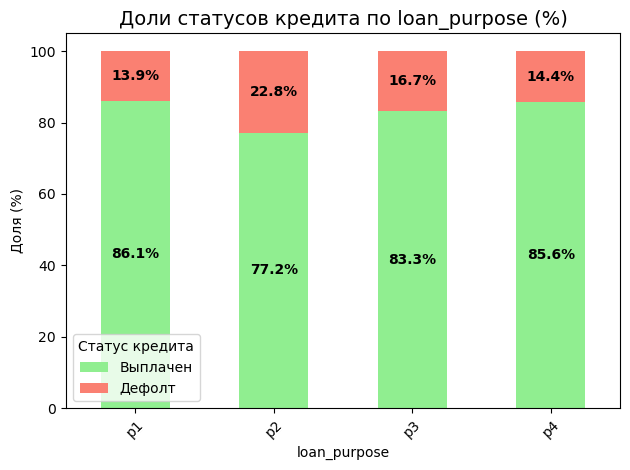

–¢–∞–±–ª–∏—Ü–∞ –¥–æ–ª–µ–π –ø–æ loan_purpose (%):
              –í—ã–ø–ª–∞—á–µ–Ω  –î–µ—Ñ–æ–ª—Ç
loan_purpose                  
p1                86.1    13.9
p2                77.2    22.8
p3                83.3    16.7
p4                85.6    14.4



In [ ]:
purpose_summary = plot_category_percentages(data_clean, 'loan_purpose')

–≠—Ç–æ –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ —Ç–∞–∫. –†–∞–∑–Ω–∏—Ü–∞ –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–∞. –í—ã–¥–µ–ª—è–µ—Ç—Å—è —Ç–æ–ª—å–∫–æ p2. 

<Figure size 1000x600 with 0 Axes>

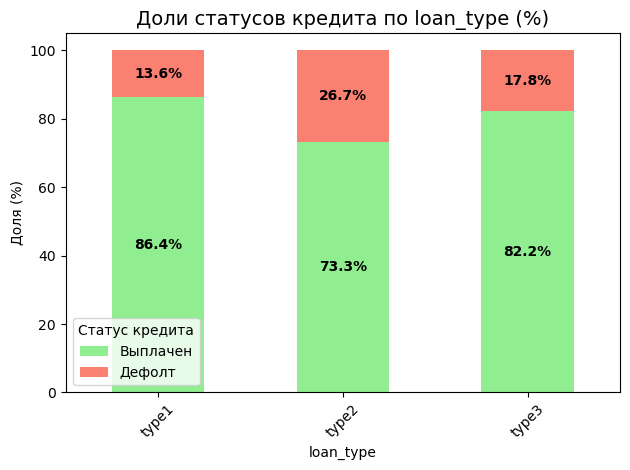

–¢–∞–±–ª–∏—Ü–∞ –¥–æ–ª–µ–π –ø–æ loan_type (%):
           –í—ã–ø–ª–∞—á–µ–Ω  –î–µ—Ñ–æ–ª—Ç
loan_type                  
type1          86.4    13.6
type2          73.3    26.7
type3          82.2    17.8



In [ ]:
type_summary = plot_category_percentages(data_clean, 'loan_type')

–ö—Ä–µ–¥–∏—Ç—ã 2 —Ç–∏–ø–∞ –Ω–µ–≤—ã–ø–ª–∞—á–∏–≤–∞—é—Ç —á–∞—â–µ.

### –ì–∏–ø–æ—Ç–µ–∑–∞ 7. –ö–æ–º–º–µ—Ä—á–µ—Å–∫–∏–µ –∫—Ä–µ–¥–∏—Ç—ã –≤–æ–∑–≤—Ä–∞—â–∞—é—Ç —á–∞—â–µ

<Figure size 1000x600 with 0 Axes>

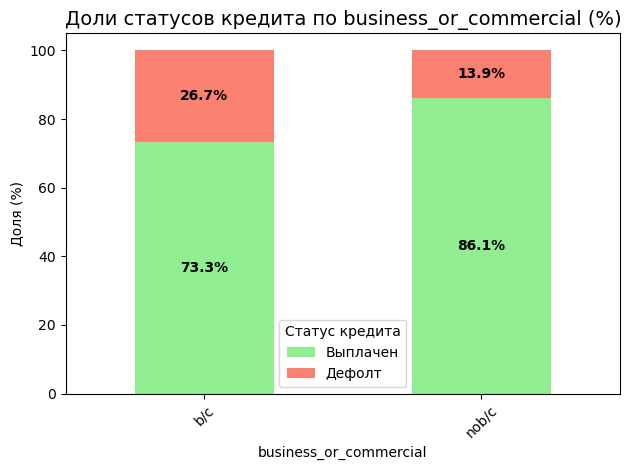

–¢–∞–±–ª–∏—Ü–∞ –¥–æ–ª–µ–π –ø–æ business_or_commercial (%):
                        –í—ã–ø–ª–∞—á–µ–Ω  –î–µ—Ñ–æ–ª—Ç
business_or_commercial                  
b/c                         73.3    26.7
nob/c                       86.1    13.9



In [ ]:
type_summary = plot_category_percentages(data_clean, 'business_or_commercial')

–ì–∏–ø–æ—Ç–µ–∑–∞ –Ω–µ –ø–æ–¥—Ç–≤–µ—Ä–¥–∏–ª–∞—Å—å. –ù–∞–æ–±–æ—Ä–æ—Ç –∫–æ–º–º–µ—Ä—á–µ—Å–∫–∏–µ –∫—Ä–µ–¥–∏—Ç—ã –≤ 2 —Ä–∞–∑–∞ —á–∞—â–µ –Ω–µ –≤–æ–∑–≤—Ä–∞—â–∞—é—Ç.

### –ì–∏–ø–æ—Ç–µ–∑–∞ 8. –ö—Ä–µ–¥–∏—Ç—ã –∫–æ—Ç–æ—Ä—ã–µ —Ç—Ä–µ–±—É—é—Ç –µ–¥–∏–Ω–æ–≤—Ä–µ–º–µ–Ω–Ω–æ–π –æ–ø–ª–∞—Ç—ã –ø–æ –∏—Å—Ç–∏—á–µ–Ω–∏—é —Å—Ä–æ–∫–∞, –≤–æ–∑–≤—Ä–∞—â–∞—é—Ç —Ä–µ–∂–µ


<Figure size 1000x600 with 0 Axes>

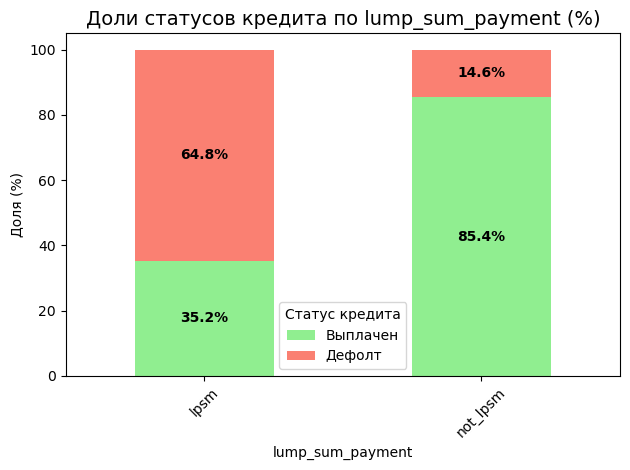

–¢–∞–±–ª–∏—Ü–∞ –¥–æ–ª–µ–π –ø–æ lump_sum_payment (%):
                  –í—ã–ø–ª–∞—á–µ–Ω  –î–µ—Ñ–æ–ª—Ç
lump_sum_payment                  
lpsm                  35.2    64.8
not_lpsm              85.4    14.6



In [ ]:
lump_sum_summary = plot_category_percentages(data_clean, 'lump_sum_payment')

–ö—Ä–µ–¥–∏—Ç—ã —Ç—Ä–µ–±—É—â–∏–µ –µ–¥–∏–Ω–æ–≤—Ä–µ–º–µ–Ω–Ω–æ–π –≤—ã–ø–ª–∞—Ç—ã –Ω–µ –≤–æ–∑–≤—Ä–∞—â–∞—é—Ç –≤ 4 —Ä–∞–∑–∞ —á–∞—â–µ. –ì–∏–ø–æ—Ç–µ–∑–∞ –ø–æ–¥—Ç–≤–µ—Ä–¥–∏–ª–∞—Å—å.

### –ì–∏–ø–æ—Ç–µ–∑–∞ 9. –ü—Ä–µ–¥–æ–¥–æ–±—Ä–µ–Ω–Ω—ã–µ –∫—Ä–µ–¥–∏—Ç—ã —á–∞—â–µ –≤–æ–∑–≤—Ä–∞—â–∞—é—Ç


<Figure size 1000x600 with 0 Axes>

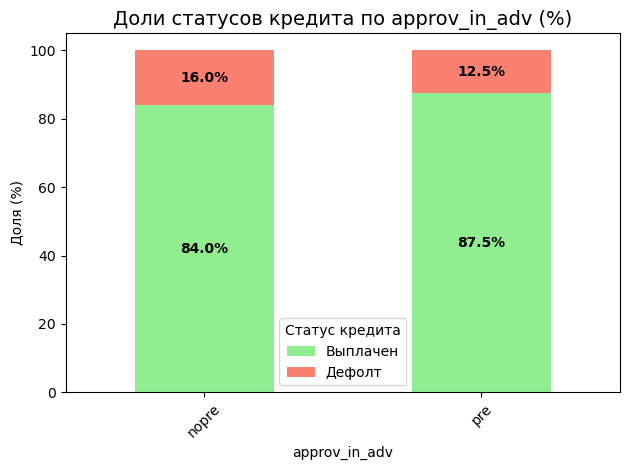

–¢–∞–±–ª–∏—Ü–∞ –¥–æ–ª–µ–π –ø–æ approv_in_adv (%):
               –í—ã–ø–ª–∞—á–µ–Ω  –î–µ—Ñ–æ–ª—Ç
approv_in_adv                  
nopre              84.0    16.0
pre                87.5    12.5



In [ ]:
aprovv_summary = plot_category_percentages(data_clean, 'approv_in_adv')

–ì–∏–ø–æ—Ç–µ–∑–∞ –Ω–µ –ø–æ–¥—Ç–≤–µ—Ä–¥–∏–ª–∞—Å—å. –î–æ–ª–∏ –≤–æ–∑–≤—Ä–∞—â–µ–Ω–Ω—ã—Ö –∫—Ä–µ–¥–∏—Ç–æ–≤ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ.

### –ì–∏–ø–æ—Ç–µ–∑–∞ 10. –ö—Ä–µ–¥–∏—Ç—ã —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–∏ –ª–∏–º–∏—Ç–∞ —á–∞—â–µ –≤–æ–∑–≤—Ä–∞—â–∞—é—Ç


<Figure size 1000x600 with 0 Axes>

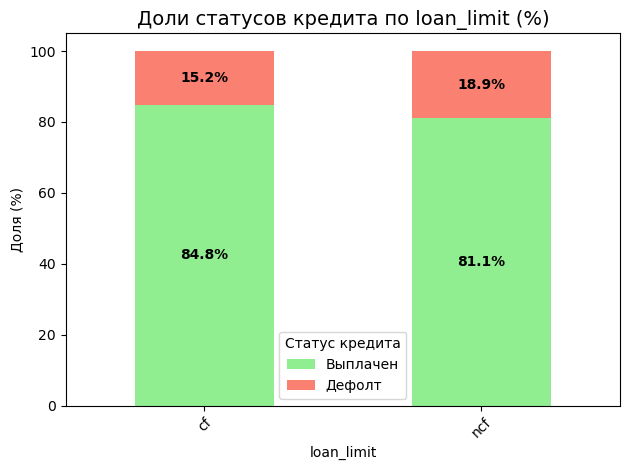

–¢–∞–±–ª–∏—Ü–∞ –¥–æ–ª–µ–π –ø–æ loan_limit (%):
            –í—ã–ø–ª–∞—á–µ–Ω  –î–µ—Ñ–æ–ª—Ç
loan_limit                  
cf              84.8    15.2
ncf             81.1    18.9



In [ ]:
loan_limit_summary = plot_category_percentages(data_clean, 'loan_limit')

–ì–∏–ø–æ—Ç–µ–∑–∞ –Ω–µ –ø–æ–¥—Ç–≤–µ—Ä–¥–∏–ª–∞—Å—å. –í–æ–∑–º–æ–∂–Ω–æ –∫—Ä–µ–¥–∏—Ç—ã –∫–æ—Ç–æ—Ä—ã–µ –≤—ã—Ö–æ–¥–∏–ª–∏ –∑–∞ –ª–∏–º–∏—Ç—ã –≤—ã–¥–∞–≤–∞–ª–∏ –Ω–∞ –∫–æ–º–º–µ—Ä—á–µ—Å–∫–∏–µ —Ü–µ–ª–∏ –≤ –Ω–∞–¥–µ–∂–¥–µ –Ω–∞ –≥—Ä–∞–º–æ—Ç–Ω–æ–µ —É–ø—Ä–∞–≤–ª–µ–Ω–∏–µ –∏ –æ—Ü–µ–Ω–∫—É —Ä–∏—Å–∫–æ–≤ –æ—Ç –∫–æ–º–ø–∞–Ω–∏–∏ –∑–∞—ë–º—â–∏–∫–∞.

<Figure size 1000x600 with 0 Axes>

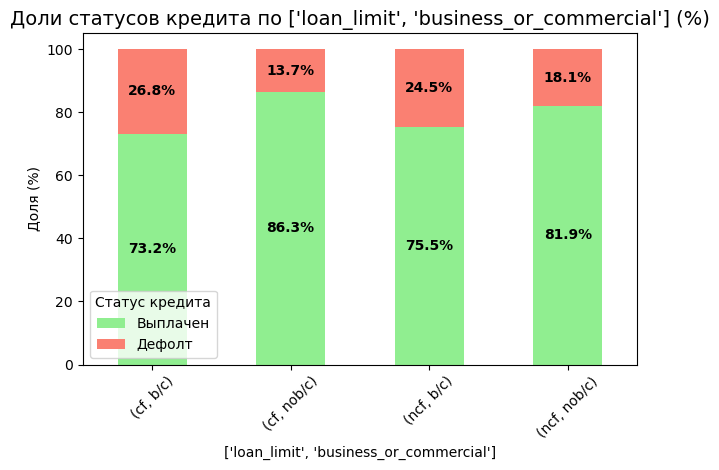

–¢–∞–±–ª–∏—Ü–∞ –¥–æ–ª–µ–π –ø–æ ['loan_limit', 'business_or_commercial'] (%):
                                   –í—ã–ø–ª–∞—á–µ–Ω  –î–µ—Ñ–æ–ª—Ç
loan_limit business_or_commercial                  
cf         b/c                         73.2    26.8
           nob/c                       86.3    13.7
ncf        b/c                         75.5    24.5
           nob/c                       81.9    18.1



In [ ]:
loan_summary= plot_category_percentages(data_clean, ['loan_limit', 'business_or_commercial'])

–¢–µ–æ—Ä–∏—è –Ω–µ –ø–æ–¥—Ç–≤–µ—Ä–¥–∏–ª–∞—Å—å. –ù–æ –≤—ã—è—Å–Ω–∏–ª–∏ —á—Ç–æ —Å–∞–º—ã–µ –Ω–∞–¥–µ–∂–Ω—ã–µ - —á–∞—Å—Ç–Ω—ã–µ –∑–∞—ë–º—â–∏–∫–∏, —Å—É–º–º–∞ –∫—Ä–µ–¥–∏—Ç–æ–≤ –∫–æ—Ç–æ—Ä—ã—Ö –Ω–∏–∂–µ –ª–∏–º–∏—Ç–∞.

### –ì–∏–ø–æ—Ç–µ–∑–∞ 11. –ó–∞—ë–º—â–∏–∫–∏ —Å –≤—ã—Å–æ–∫–æ–π –∫—Ä–µ–¥–∏—Ç–æ—Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å—é —á–∞—â–µ –≤–æ–∑–≤—Ä–∞—â–∞—é—Ç –∫—Ä–µ–¥–∏—Ç—ã


<Figure size 1000x600 with 0 Axes>

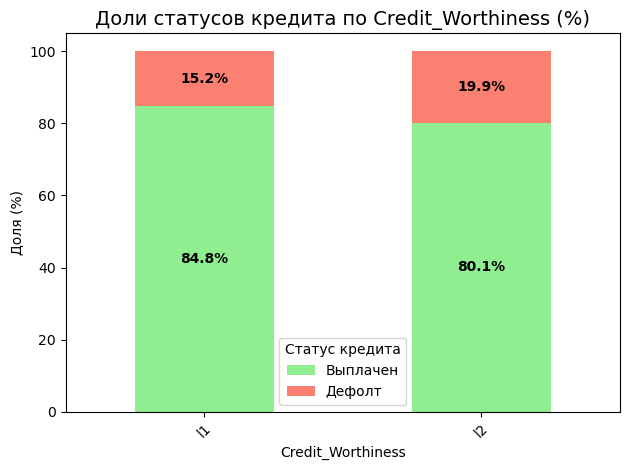

–¢–∞–±–ª–∏—Ü–∞ –¥–æ–ª–µ–π –ø–æ Credit_Worthiness (%):
                   –í—ã–ø–ª–∞—á–µ–Ω  –î–µ—Ñ–æ–ª—Ç
Credit_Worthiness                  
l1                     84.8    15.2
l2                     80.1    19.9



In [ ]:
term_summary = plot_category_percentages(data_clean, 'Credit_Worthiness')

–†–∞–∑–Ω–∏—Ü–∞ –Ω–µ —Å—Ç–æ–ª—å –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–∞. 

### –ì–∏–ø–æ—Ç–µ–∑–∞ 12. –í–∑—Ä–æ—Å–ª—ã–µ –ª—é–¥–∏ —á–∞—â–µ –≤–æ–∑–≤—Ä–∞—â–∞—é—Ç –∫—Ä–µ–¥–∏—Ç—ã, —á–µ–º –±–æ–ª–µ–µ –º–æ–ª–æ–¥—ã–µ


<Figure size 1000x600 with 0 Axes>

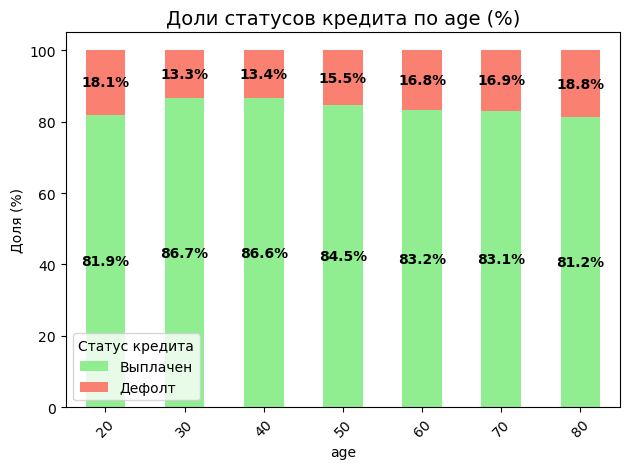

–¢–∞–±–ª–∏—Ü–∞ –¥–æ–ª–µ–π –ø–æ age (%):
     –í—ã–ø–ª–∞—á–µ–Ω  –î–µ—Ñ–æ–ª—Ç
age                  
20       81.9    18.1
30       86.7    13.3
40       86.6    13.4
50       84.5    15.5
60       83.2    16.8
70       83.1    16.9
80       81.2    18.8



In [ ]:
age_summary = plot_category_percentages(data_clean, 'age')

–ì–∏–ø–æ—Ç–µ–∑–∞ –Ω–µ –ø–æ–¥—Ç–≤–µ—Ä–¥–∏–ª–∞—Å—å. –í–æ–∑—Ä–∞—Å—Ç –Ω–µ –≤–ª–∏—è–µ—Ç –Ω–∞ –≤—ã–ø–ª–∞—Ç—ã –∫—Ä–µ–¥–∏—Ç–∞.

### –ì–∏–ø–æ—Ç–µ–∑–∞ 13. –ó–∞—ë–º—â–∏–∫–∏ —Å –Ω–∏–∑–∫–º dtir1 (–º–µ–Ω—å—à–µ–π –∫—Ä–µ–¥–∏—Ç–Ω–æ–π –Ω–∞–≥—Ä—É–∑–∫–æ–π) —á–∞—â–µ –≤–æ–∑–≤—Ä–∞—â–∞—é—Ç –¥–æ–ª–≥

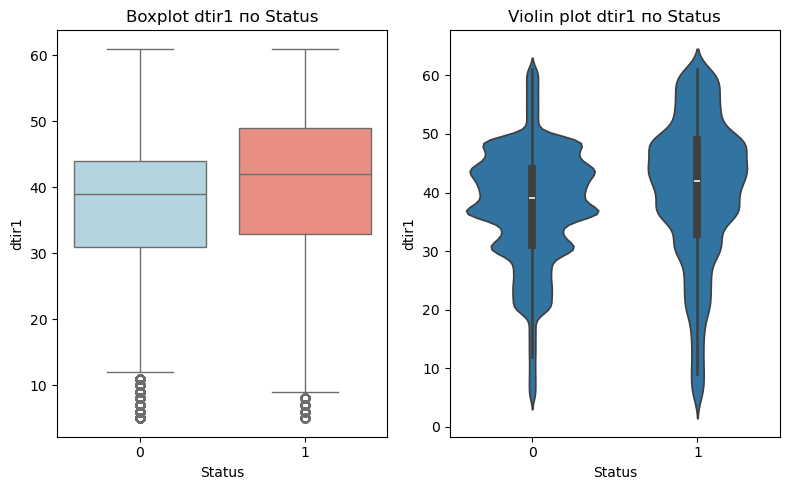


–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ dtir1 –ø–æ Status:
          count       mean        std  min   25%   50%   75%   max
Status                                                            
0       94301.0  37.607523   9.824307  5.0  31.0  39.0  44.0  61.0
1       17159.0  40.140859  12.374834  5.0  33.0  42.0  49.0  61.0


In [ ]:
plot_feature_by_target(data_clean, 'dtir1', 'Status')

–ì–∏–ø–æ—Ç–µ–∑–∞ –ø–æ–¥—Ç–≤–µ—Ä–¥–∏–ª–∞—Å—å. Boxplot –¥–ª—è –Ω–µ–≤—ã–ø–ª–∞—á–µ–Ω–Ω—ã—Ö –∫—Ä–µ–¥–∏—Ç–æ–≤ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –∑–∞–º–µ—Ç–Ω–æ –≤—ã—à–µ. –¢–∞–∫ –∂–µ violinplot –¥–ª—è –Ω–µ –≤—ã–ø–ª–∞—á–µ–Ω–Ω—ã—Ö –∫—Ä–µ–¥–∏—Ç–æ–≤ —Å–∏–ª—å–Ω–æ –≤—ã—Ç—è–Ω—É—Ç –≤ —Å—Ç–æ—Ä–æ–Ω—É –±–æ–ª—å—à–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –∏ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –≤—ã—à–µ, –∞ –∑–Ω–∞—á–∏—Ç –≤ –Ω—ë–º –ø—Ä–µ–æ–±–ª–∞–¥–∞—é—Ç –±–æ–ª—å—à–∏–µ –∑–Ω–∞—á–µ–Ω–∏–µ—è. 

### –ì–∏–ø–æ—Ç–µ–∑–∞ 14. Region –Ω–µ –≤–ª–∏—è–µ—Ç –Ω–∞ –¥–µ—Ñ–æ–ª—Ç

<Figure size 1000x600 with 0 Axes>

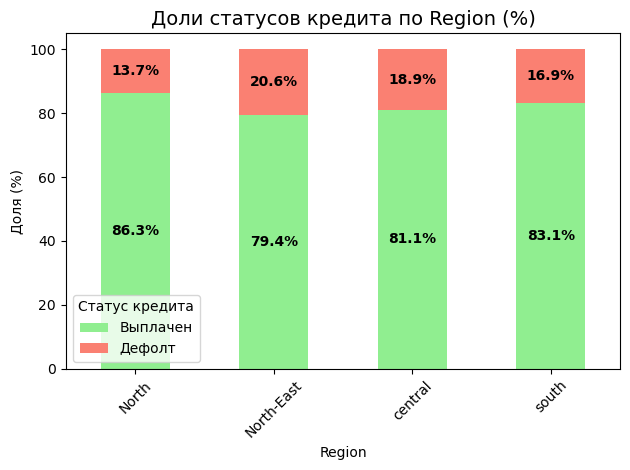

–¢–∞–±–ª–∏—Ü–∞ –¥–æ–ª–µ–π –ø–æ Region (%):
            –í—ã–ø–ª–∞—á–µ–Ω  –î–µ—Ñ–æ–ª—Ç
Region                      
North           86.3    13.7
North-East      79.4    20.6
central         81.1    18.9
south           83.1    16.9



In [ ]:
age_summary = plot_category_percentages(data_clean, 'Region')

–ì–∏–ø–æ—Ç–µ–∑–∞ –ø–æ–¥—Ç–≤–µ—Ä–¥–∏–ª–∞—Å—å. –í –¥–∞–ª—å–Ω–µ–π—à–µ–º –º–æ–∂–Ω–æ –±—É–¥–µ—Ç —É–±—Ä–∞—Ç—å —ç—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫ –¥–ª—è —É–ø—Ä–æ—â–µ–Ω–∏—è –º–æ–¥–µ–ª–∏.

### –ì–∏–ø–æ—Ç–µ–∑–∞ 15. –¢–∏–ø –∫—Ä–µ–¥–∏—Ç–∞ –≤–ª–∏—è–µ—Ç –Ω–∞ —Ç–æ –≤–µ—Ä–Ω—É—Ç—å –µ–≥–æ –∏–ª–∏ –Ω–µ—Ç

<Figure size 1000x600 with 0 Axes>

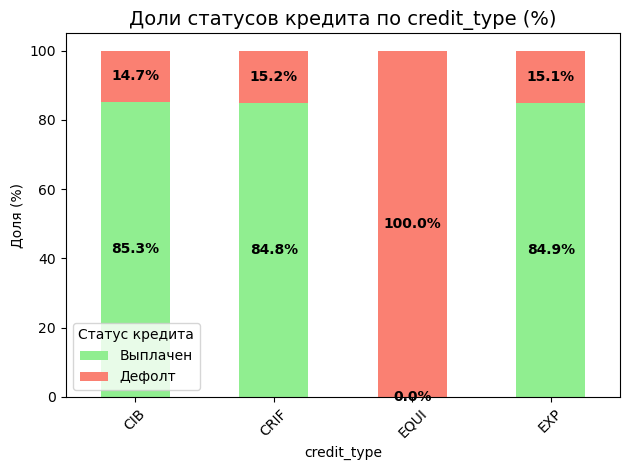

–¢–∞–±–ª–∏—Ü–∞ –¥–æ–ª–µ–π –ø–æ credit_type (%):
             –í—ã–ø–ª–∞—á–µ–Ω  –î–µ—Ñ–æ–ª—Ç
credit_type                  
CIB              85.3    14.7
CRIF             84.8    15.2
EQUI              0.0   100.0
EXP              84.9    15.1



In [615]:
creditType_summary = plot_category_percentages(data_clean, 'credit_type')

In [616]:
data_clean.credit_type.value_counts()

credit_type
CIB     40982
CRIF    37517
EXP     34622
EQUI    10740
Name: count, dtype: int64

–ö—Ä–µ–¥–∏—Ç—ã —Å —Ç–∏–ø–æ–º EQUI –≤–æ–æ–±—â–µ –Ω–µ –≤—ã–ø–ª–∞—á–∏–≤–∞–ª–∏

# 4. ML

–í —Å–∏–ª—É —Ç–æ–≥–æ, —á—Ç–æ –¥–∞—Ç–∞—Å–µ—Ç —Å–æ–¥–µ—Ä–∂–∏—Ç –¥–∞–Ω–Ω—ã–µ –æ –∏–ø–æ—Ç–µ—á–Ω—ã—Ö –∫—Ä–µ–¥–∏—Ç–∞—Ö, –¥–ª—è –±–∞–Ω–∫–æ–≤ –≤–∞–∂–Ω–æ –Ω–µ –≤—ã–¥–∞–≤–∞—Ç—å –∫—Ä–µ–¥–∏—Ç—ã –Ω–µ–Ω–∞–¥–µ–∂–Ω—ã–º –∑–∞—ë–º—â–∏–∫–∞–º. –ü–æ—Ç–æ–º—É —á—Ç–æ —É–±—ã—Ç–∫–∏ –≤ —Ç–∞–∫–æ–º —Å–ª—É—á–∞–µ –≤–µ–ª–∏–∫–∏. –¢–∞–∫ –∂–µ –≤–∞–∂–Ω–∞ –Ω–µ —Ç–æ–ª—å–∫–æ –º–µ—Ç–∫–∞ —Ü–µ–ª–µ–≤–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, –Ω–æ –∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –¥–µ—Ñ–æ–ª—Ç–∞. –ü–æ—ç—Ç–∏–º –ø—Ä–∏—á–∏–Ω–∞–º –±—É–¥—É—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –º–µ—Ç—Ä–∏–∫–∏ Recall –∏ Gini

## 3.1 Baseline logistic regression
–í –∫–∞—á–µ—Å—Ç–≤–µ –±–∞–∑–æ–≤–æ–π –º–æ–¥–µ–ª–∏ –≤–æ–∑—å–º—ë–º –º–æ–¥–µ–ª—å –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏. 
–ü—Ä–µ–∏–º—É—â–µ—Å—Ç–≤–∞–º–∏ –¥–∞–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ —è–≤–ª—è—é—Ç—Å—è: 
- –ü—Ä–æ–∑—Ä–∞—á–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–∏: –õ–µ–≥–∫–æ –ø–æ–Ω—è—Ç—å, –∫–∞–∫ –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤–ª–∏—è—é—Ç –Ω–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ

- –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–Ω—ã–π –≤—ã–≤–æ–¥: –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –∫–ª–∞—Å—Å–æ–≤, –∞ –Ω–µ —Ç–æ–ª—å–∫–æ –º–µ—Ç–∫–∏

- –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã: –ú–æ–∂–Ω–æ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞—Ç—å –≤–ª–∏—è–Ω–∏–µ –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞

In [2]:
data = pd.read_csv('Data\privilege_clean_data.csv')
X, Y = data.drop(['Status'], axis=1), data['Status']
X = pd.get_dummies(X, drop_first=True)

–ë—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –µ—â–µ –∏ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—É—é –≤—ã–±–æ—Ä–∫—É –¥–ª—è —Ç–æ–≥–æ —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å —É—Ç–µ—á–∫–∏ –¥–∞–Ω–Ω—ã—Ö –∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —ç—Ç—É –≤—ã–±–æ—Ä–∫—É –¥–ª—è –ø–æ–¥–±–æ—Ä–∞ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤.

In [4]:
def split_data_stratified(X, y, test_size=0.2, random_state=42, need_validate=False, val_size=0.2):
    # –°–Ω–∞—á–∞–ª–∞ –æ—Ç–¥–µ–ª—è–µ–º test
    if need_validate:
        X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
        )
        # –ó–∞—Ç–µ–º temp –¥–µ–ª–∏–º –Ω–∞ train/validation
        val_size_adj = val_size / (1 - test_size)  # –∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä—É–µ–º —Ä–∞–∑–º–µ—Ä
        X_train, X_val, y_train, y_val = train_test_split(
            X_temp, y_temp, test_size=val_size_adj, stratify=y_temp, random_state=random_state
        )
        print(f"–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤:")
        print(f"Train:      {pd.Series(y_train).value_counts().sort_index().values}")
        print(f"Validation: {pd.Series(y_val).value_counts().sort_index().values}")
        print(f"Test:       {pd.Series(y_test).value_counts().sort_index().values}")
        return X_train, X_val, X_test, y_train, y_val, y_test
    else:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, stratify=y, random_state=random_state
        )
        print(f"–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤:")
        print(f"Train:      {pd.Series(y_train).value_counts().sort_index().values}")
        print(f"Test:       {pd.Series(y_test).value_counts().sort_index().values}")
        return X_train, X_test, y_train, y_test
        
        
# –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ
X_train, X_test, y_train, y_test = split_data_stratified(X, Y)

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤:
Train:      [76917 22171]
Test:       [19230  5543]


In [5]:
std_scaler = StandardScaler().fit(X_train)
X_train_scl = std_scaler.transform(X_train)
X_test_scl = std_scaler.transform(X_test)

In [6]:
def evaluate_credit_model(y_true, y_pred, y_pred_proba, model_name="Model"):
    
    # –ï—Å–ª–∏ y_pred_proba —Å–æ–¥–µ—Ä–∂–∏—Ç –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –¥–ª—è –æ–±–æ–∏—Ö –∫–ª–∞—Å—Å–æ–≤, –±–µ—Ä–µ–º —Ç–æ–ª—å–∫–æ –¥–ª—è –∫–ª–∞—Å—Å–∞ 1
    if y_pred_proba.ndim > 1 and y_pred_proba.shape[1] > 1:
        y_pred_proba = y_pred_proba[:, 1]
    
    results = {}
    
    print("=" * 60)
    print(f"üìä –ö–û–ú–ü–õ–ï–ö–°–ù–ê–Ø –û–¶–ï–ù–ö–ê –ú–û–î–ï–õ–ò: {model_name}")
    print("=" * 60)
    
    # 2. –ö—Ä–µ–¥–∏—Ç–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏
    print("\nüéØ –ö–†–ï–î–ò–¢–ù–´–ï –ú–ï–¢–†–ò–ö–ò:")
    print("-" * 30)
    
    # Gini coefficient
    print(y_true.shape, y_pred_proba.shape)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    gini = 2 * roc_auc - 1
    results['ROC-AUC'] = roc_auc
    results['Gini'] = gini
    
    
    # AUC-PR
    pr_auc = average_precision_score(y_true, y_pred_proba)
    results['AUC-PR'] = pr_auc
    
    print(f"ROC-AUC:      {roc_auc:.4f}")
    print(f"Gini:         {gini:.4f}")
    print(f"AUC-PR:       {pr_auc:.4f}")
    

    # 4. –ö–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–µ –º–µ—Ç—Ä–∏–∫–∏
    print("\nüìà –ö–õ–ê–°–°–ò–ß–ï–°–ö–ò–ï –ú–ï–¢–†–ò–ö–ò:")
    print("-" * 30)
    
    precision_default = precision_score(y_true, y_pred, pos_label=1)
    recall_default = recall_score(y_true, y_pred, pos_label=1)
    f1_default = f1_score(y_true, y_pred, pos_label=1)
    
    results['Precision (Default)'] = precision_default
    results['Recall (Default)'] = recall_default
    results['F1 (Default)'] = f1_default
    
    print(f"Precision (Default): {precision_default:.4f}")
    print(f"Recall (Default):    {recall_default:.4f}")
    print(f"F1 (Default):       {f1_default:.4f}")
    
   
    
    # 7. –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
    print("\nüìä –í–ò–ó–£–ê–õ–ò–ó–ê–¶–ò–ò:")
    print("-" * 30)
    
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))
    fig.suptitle(f'–ê–Ω–∞–ª–∏–∑ –º–æ–¥–µ–ª–∏: {model_name}', fontsize=16)
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    axes[0].plot(fpr, tpr, label=f'ROC (AUC = {roc_auc:.3f})', linewidth=2)
    axes[0].plot([0, 1], [0, 1], 'k--', alpha=0.5)
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].set_title('ROC Curve')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
    axes[1].plot(recall, precision, label=f'PR (AUC = {pr_auc:.3f})', linewidth=2)
    axes[1].set_xlabel('Recall')
    axes[1].set_ylabel('Precision')
    axes[1].set_title('Precision-Recall Curve')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    
    plt.tight_layout()
    plt.show()
    
    
    return results


### Data with extra info about missing values

In [7]:
logRegressClf = LogisticRegression()

In [8]:
logRegressClf.fit(X_train_scl, y_train)

LogisticRegression()

üìä –ö–û–ú–ü–õ–ï–ö–°–ù–ê–Ø –û–¶–ï–ù–ö–ê –ú–û–î–ï–õ–ò: Logistic Regression 

üéØ –ö–†–ï–î–ò–¢–ù–´–ï –ú–ï–¢–†–ò–ö–ò:
------------------------------
(24773,) (24773,)
ROC-AUC:      1.0000
Gini:         1.0000
AUC-PR:       1.0000

üìà –ö–õ–ê–°–°–ò–ß–ï–°–ö–ò–ï –ú–ï–¢–†–ò–ö–ò:
------------------------------
Precision (Default): 1.0000
Recall (Default):    1.0000
F1 (Default):       1.0000

üìä –í–ò–ó–£–ê–õ–ò–ó–ê–¶–ò–ò:
------------------------------


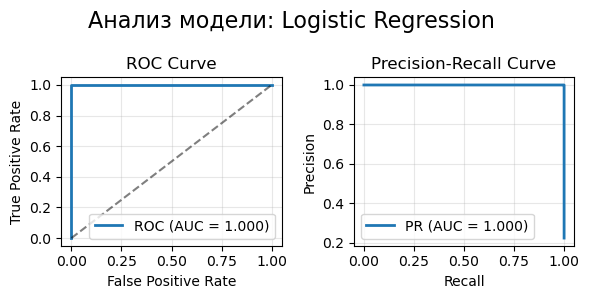

In [ ]:
pred_class = logRegressClf.predict(X_test_scl)
pred_proba = logRegressClf.predict_proba(X_test_scl)
results_extra_info = evaluate_credit_model(y_test, pred_class, pred_proba, "Logistic Regression ")

–ú–æ–¥–µ–ª—å –ø–æ–∫–∞–∑–∞–ª–∞ –∏–¥–µ–∞–ª—å–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã. –≠—Ç–æ –ø—Ä–æ–∏–∑–æ—à–ª–æ –ø–æ—Ç–æ–º—É, —á—Ç–æ –Ω–∞—à –¥–∞—Ç–∞—Å–µ—Ç —Å–æ–¥–µ—Ä–∂–∞–ª –¥–∞–Ω–Ω—ã–µ –æ —Ç–æ–º –∫–∞–∫–∏–µ –¥–∞–Ω–Ω—ã–µ –±—ã–ª–∏ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω—ã. –ê –¥–ª—è –Ω–µ–≤—ã–ø–ª–∞—á–µ–Ω–Ω—ã—Ö –∫—Ä–µ–¥–∏—Ç–æ–≤ –Ω–µ—Å–∫–æ–ª—å–∫–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –æ—Ç—Å—É—Ç—Å–≤–æ–≤–∞–ª–∏ –ø–æ–ª–Ω–æ—Å—Ç—å—é. 

In [11]:
def value_of_features_in_regres(model, data, top=None):
    coeff =model.coef_.tolist()
    column_names = data.columns.tolist()
    name2coeff = {}
    for i in range(len(coeff[0])):
        name2coeff[column_names[i]] = coeff[0][i]
    if top:
        sorted_by_importance = dict(sorted(name2coeff.items(), key=lambda x: x[1], reverse=True)[:top])
        for feature, value in sorted_by_importance.items():
            print(feature, ':', value)
    else:
        sorted_by_importance = dict(sorted(name2coeff.items(), key=lambda x: x[1], reverse=True))
        for feature, value in sorted_by_importance.items():
            print(feature, ':', value)

In [12]:
value_of_features_in_regres(logRegressClf, X)

rate_of_interest_missing : 7.163153031219871
credit_type_EQUI : 1.1833686613246674
property_value_missing : 1.0604459339217196
LTV_missing : 1.0604459339217196
dtir1_missing : 0.5856317668630963
submission_of_application_to_inst : 0.08218696671462376
co-applicant_credit_type_EXP : 0.05224974428135576
Secured_by_land : 0.04864855778336088
age_55-64 : 0.033026233312967626
Credit_Worthiness_l2 : 0.031780249333904026
loan_limit_ncf : 0.028940765442166103
loan_purpose_p2 : 0.02770487401611986
Region_central : 0.026423090501526098
dtir1 : 0.02583255695624504
age_45-54 : 0.024863961868373297
loan_type_type2 : 0.024420326955054715
age_>74 : 0.01752278783612
Credit_Score : 0.015008834990459595
Region_south : 0.010104885074786636
property_value : 0.008688493525837844
Region_North-East : 0.008636097102986236
loan_purpose_p3 : 0.007134349507989524
LTV : 0.006273507024557631
age_<25 : 0.005309652787398884
Gender_Male : 0.004563609179288877
age_35-44 : 0.0005858491047321659
term_short : -0.002060934

–ú–æ–∂–Ω–æ –∑–∞–º–µ—Ç–∏—Ç—å —á—Ç–æ —Å–∞–º—ã–µ –±–æ–ª—å—à–∏–µ –≤–µ—Å–∞ —É –ø—Ä–∏–∑–Ω–∞–∫–∏ –≥–æ–≤–æ—Ä—è—â–∏–µ –æ –ø—Ä–æ–ø—É—Å–∫–µ –¥–∞–Ω–Ω—ã—Ö. –£–±–µ—Ä–µ–º —ç—Ç–∏ –¥–∞–Ω–Ω—ã–µ –∏ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø–æ–≤–µ–¥–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏. –í –¥–∞–ª—å–Ω–µ–π—à–µ–º –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–∞—Ç–∞—Å–µ—Ç –±–µ–∑ –ø—Ä–∏–≤–µ–ª–∏–≥–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏.

### Data without extra information about missing data

In [16]:
data = pd.read_csv('Data\clean_data_no_extra_info.csv')

In [17]:
X, Y = data.drop(['Status'], axis=1), data['Status']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = split_data_stratified(X, Y, )

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤:
Train:      [76917 22171]
Test:       [19230  5543]


In [18]:
std_scaler = StandardScaler().fit(X_train)
X_train_scl = std_scaler.transform(X_train)
X_test_scl = std_scaler.transform(X_test)

In [19]:
logRegressClfNoExtraInfo = LogisticRegression()

In [20]:
logRegressClfNoExtraInfo.fit(X_train_scl, y_train)

LogisticRegression()

üìä –ö–û–ú–ü–õ–ï–ö–°–ù–ê–Ø –û–¶–ï–ù–ö–ê –ú–û–î–ï–õ–ò: Logistic Regression 

üéØ –ö–†–ï–î–ò–¢–ù–´–ï –ú–ï–¢–†–ò–ö–ò:
------------------------------
(24773,) (24773,)
ROC-AUC:      0.8225
Gini:         0.6450
AUC-PR:       0.7293

üìà –ö–õ–ê–°–°–ò–ß–ï–°–ö–ò–ï –ú–ï–¢–†–ò–ö–ò:
------------------------------
Precision (Default): 0.9447
Recall (Default):    0.4588
F1 (Default):       0.6176

üìä –í–ò–ó–£–ê–õ–ò–ó–ê–¶–ò–ò:
------------------------------


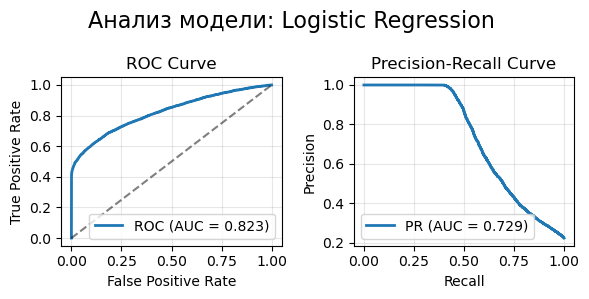

In [22]:
pred_class = logRegressClfNoExtraInfo.predict(X_test_scl)
pred_proba = logRegressClfNoExtraInfo.predict_proba(X_test_scl)
results_base1 = evaluate_credit_model(y_test, pred_class, pred_proba, "Logistic Regression ")

–ú–æ–¥–µ–ª—å –ø–æ–∫–∞–∑–∞–ª–∞ —Ö–æ—Ä–æ—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã. –í –¥–∞–Ω–Ω–æ–π –∑–∞–¥–∞—á–µ –¥–ª—è –Ω–∞—Å –≤–∞–∂–Ω–µ–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª—å recall, –ø–æ—Ç–æ–º—É —á—Ç–æ –º—ã –Ω–µ—Å—ë–º –æ—á–µ–Ω—å –±–æ–ª—å—à–∏–µ —É–±—ã—Ç–∫–∏, –µ—Å–ª–∏ –∑–∞—ë–º—â–∏–∫ –Ω–µ –≤–µ—Ä–Ω—ë—Ç –∫—Ä–µ–¥–∏—Ç. –í –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç —Ç—Ä–µ–±–æ–≤–∞–Ω–∏–π –±–∏–∑–Ω–µ—Å–∞ Recall –º–æ–∂–Ω–æ —É–ª—É—á—à–∏—Ç—å –∑–∞ —Å—á—ë—Ç –∏–∑–º–µ–Ω–µ–Ω–∏—è –ø–æ—Ä–æ–≥–∞ (trashhold).

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –¥–∞–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ –±—É–¥–µ–º —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å –∫–∞–∫ baseline

In [23]:
joblib.dump(logRegressClfNoExtraInfo, 'models/logistic_regression_model.joblib')

['models/logistic_regression_model.joblib']

In [24]:
table_of_results = pd.DataFrame.from_dict({'baseline':results_base1}, orient='index')

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

In [25]:
value_of_features_in_regres(logRegressClfNoExtraInfo, X)

credit_type_EQUI : 3.0004004962781656
LTV : 0.6349114071094388
property_value : 0.5056854179119881
submission_of_application_to_inst : 0.32336021512579205
loan_purpose_p3 : 0.17454769776916995
age_55-64 : 0.15400368629335115
dtir1 : 0.15112166650802125
loan_purpose_p2 : 0.1426401670431262
Secured_by_land : 0.1399410384141838
loan_purpose_p4 : 0.13517705289351925
age_45-54 : 0.12859230790189552
age_65-74 : 0.1141035664381624
Region_south : 0.10469483514687151
loan_limit_ncf : 0.09821393593381812
age_>74 : 0.0909189046416923
Credit_Worthiness_l2 : 0.08284574380287307
Region_central : 0.06329521261809905
Gender_Male : 0.05787592328108158
age_35-44 : 0.04421698104806584
loan_type_type2 : 0.03069607795323362
Region_North-East : 0.027129740210576403
credit_type_CRIF : 0.02193632920643106
age_<25 : 0.020538969225217103
Credit_Score : 0.01342415256252053
Gender_Sex Not Available : 0.00459741247095174
Gender_Joint : 0.0032923810997369423
credit_type_EXP : -0.007120577578555902
term_short : -0.0

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º –∞–±—Å–æ–ª—é—Ç–Ω—É—é –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

In [26]:
def show_absolute_value_of_features_in_regres(model, data, top=None):
    coeff =model.coef_.tolist()
    column_names = data.columns.tolist()
    for i, v in enumerate(coeff[0]):
        coeff[0][i] = abs(v)
        
    name2coeff = {}
    for i in range(len(coeff[0])):
        name2coeff[column_names[i]] = coeff[0][i]
    if top:
        sorted_by_importance = dict(sorted(name2coeff.items(), key=lambda x: x[1], reverse=True)[:top])
        for feature, value in sorted_by_importance.items():
            print(feature, ':', value)
    else:
        sorted_by_importance = dict(sorted(name2coeff.items(), key=lambda x: x[1], reverse=True))
        for feature, value in sorted_by_importance.items():
            print(feature, ':', value)

In [27]:
show_absolute_value_of_features_in_regres(logRegressClfNoExtraInfo, X)

credit_type_EQUI : 3.0004004962781656
LTV : 0.6349114071094388
property_value : 0.5056854179119881
loan_amount : 0.39567718857387535
lump_sum_payment_not_lpsm : 0.37900739998932853
submission_of_application_to_inst : 0.32336021512579205
Neg_ammortization_not_neg : 0.2954421702495085
income : 0.22958715962611514
loan_type_type3 : 0.18605326172778144
loan_purpose_p3 : 0.17454769776916995
age_55-64 : 0.15400368629335115
dtir1 : 0.15112166650802125
loan_purpose_p2 : 0.1426401670431262
Secured_by_land : 0.1399410384141838
loan_purpose_p4 : 0.13517705289351925
age_45-54 : 0.12859230790189552
age_65-74 : 0.1141035664381624
co-applicant_credit_type_EXP : 0.10713421502196825
Region_south : 0.10469483514687151
loan_limit_ncf : 0.09821393593381812
age_>74 : 0.0909189046416923
approv_in_adv_pre : 0.08534637958951229
Credit_Worthiness_l2 : 0.08284574380287307
interest_only_not_int : 0.06339677755099372
Region_central : 0.06329521261809905
rate_of_interest : 0.060676058303318625
Gender_Male : 0.0578

## 3.2 logistic regression

–ú–æ–∂–Ω–æ —É–º–µ–Ω—å—à–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –º–æ–¥–µ–ª–∏. –ë—É–¥–µ–º –¥–µ–π—Å—Ç–≤–æ–≤–∞—Ç—å —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º :
 - –ò–∑ –ø—Ä–µ–¥–≤–∞—Ä–∏—Ç–µ–ª—å–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –º—ã –∑–Ω–∞–µ–º, —á—Ç–æ loan_amount –∏ property_value –∏–º–µ—é—Ç —Å–∏–ª—å–Ω—É—é –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å. –ò –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏ —ç—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞—é—Ç (–æ–Ω–∏ –ø–æ—á—Ç–∏ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ, –Ω–æ —Å —Ä–∞–∑–Ω—ã–º–∏ –∑–Ω–∞–∫–∞–º–∏). –£–±–µ—Ä—ë–º property value –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞, –ø–æ—Ç–æ–º—É —á—Ç–æ –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –±—ã–ª–∏ –≤–æ—Å—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–Ω—ã.
 - –ü—Ä–∏–∑–Ω–∞–∫ –ø–æ–ª –º–∞–ª–æ –≤–ª–∏—è–µ—Ç –Ω–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è. –¢–∞–∫ –∂–µ –µ–≥–æ —É–±–µ—Ä—ë–º.
 - –¢–∞–∫–∂–µ –º–µ—Å—Ç–æ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏—è –Ω–µ–¥–≤–∏–∂–∏–º–æ—Å—Ç–∏ —Å–ª–∞–±–æ –≤–ª–∏—è–µ—Ç –Ω–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ
 
 –î–ª—è —Ç–æ–≥–æ —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å —É—Ç–µ—á–∫–∏ –¥–∞–Ω–Ω—ã—Ö, —Ä–∞–∑–¥–µ–ª–∏–º –≤—ã–±–æ—Ä–∫—É –Ω–∞ train, validation, test. 

In [69]:
data = pd.read_csv('Data\clean_data_no_extra_info.csv')
data = data.drop(['Gender', 'property_value', 'Region'], axis=1)
X, Y = data.drop(['Status'], axis=1), data['Status']
X = pd.get_dummies(X, drop_first=True)

In [28]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data_stratified(X, Y, need_validate=True)

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤:
Train:      [57688 16628]
Validation: [19229  5543]
Test:       [19230  5543]


In [29]:
std_scaler = StandardScaler().fit(X_train)
X_train_scl = std_scaler.transform(X_train)
X_val_scl = std_scaler.transform(X_val)
X_test_scl = std_scaler.transform(X_test)

In [30]:
logRegressClf_Tuned = LogisticRegression()

In [31]:
logRegressClf_Tuned.fit(X_train_scl, y_train)

LogisticRegression()

üìä –ö–û–ú–ü–õ–ï–ö–°–ù–ê–Ø –û–¶–ï–ù–ö–ê –ú–û–î–ï–õ–ò: Logistic Regression 

üéØ –ö–†–ï–î–ò–¢–ù–´–ï –ú–ï–¢–†–ò–ö–ò:
------------------------------
ROC-AUC:      0.8191
Gini:         0.6381
AUC-PR:       0.7258

üìà –ö–õ–ê–°–°–ò–ß–ï–°–ö–ò–ï –ú–ï–¢–†–ò–ö–ò:
------------------------------
Precision (Default): 0.9506
Recall (Default):    0.4550
F1 (Default):       0.6154

üìä –í–ò–ó–£–ê–õ–ò–ó–ê–¶–ò–ò:
------------------------------


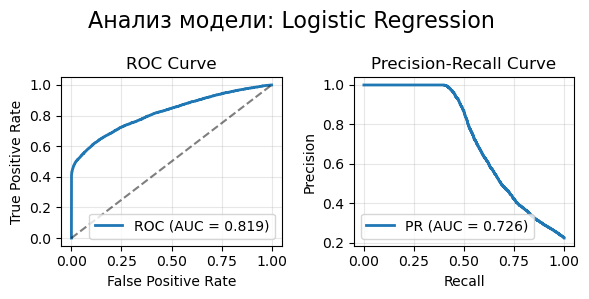

In [ ]:
pred_class = logRegressClf_Tuned.predict(X_val_scl)
pred_proba = logRegressClf_Tuned .predict_proba(X_val_scl)
results = evaluate_credit_model(y_test, pred_class, pred_proba, "Logistic Regression ")

–ö–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏ –ø–æ—á—Ç–∏ –Ω–µ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å.

–í–æ–∑–º–æ–∂–Ω—ã–µ –ø—É—Ç–∏ —É–ª—É—á—à–µ–Ω–∏—è:
 - –ú–æ–¥–µ–ª—å –Ω–µ –∑–Ω–∞–µ—Ç –æ –¥–∏—Å–±–∞–ª–∞–Ω—Å–µ –∫–ª–∞—Å—Å–æ–≤. –î–æ–±–∞–≤–∏–º —à—Ç—Ä–∞—Ñ –∑–∞ –æ—à–∏–±–∫—É –Ω–∞ –º–∏–Ω–∞—Ä–∏—Ç–∞—Ä–Ω–æ–º –∫–ª–∞—Å—Å–µ.
 - –° –ø–æ–º–æ—â—å—é GridSearh –ø–æ–¥–±–µ—Ä—ë–º –ª—É—á—à–∏–π —Ç–∏–ø –∏ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ 

In [92]:
logRegressClf_Tuned = LogisticRegression(class_weight='balanced')

üìä –ö–û–ú–ü–õ–ï–ö–°–ù–ê–Ø –û–¶–ï–ù–ö–ê –ú–û–î–ï–õ–ò: Logistic Regression 

üéØ –ö–†–ï–î–ò–¢–ù–´–ï –ú–ï–¢–†–ò–ö–ò:
------------------------------
ROC-AUC:      0.8237
Gini:         0.6475
AUC-PR:       0.7278

üìà –ö–õ–ê–°–°–ò–ß–ï–°–ö–ò–ï –ú–ï–¢–†–ò–ö–ò:
------------------------------
Precision (Default): 0.5904
Recall (Default):    0.6296
F1 (Default):       0.6094

üìä –í–ò–ó–£–ê–õ–ò–ó–ê–¶–ò–ò:
------------------------------


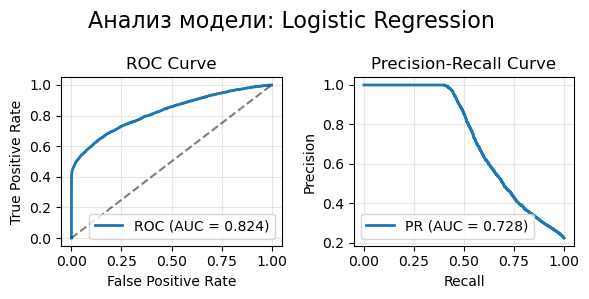

In [93]:
logRegressClf_Tuned.fit(X_train_scl, y_train)
pred_class = logRegressClf_Tuned.predict(X_test_scl)
pred_proba = logRegressClf_Tuned .predict_proba(X_test_scl)
results_balanced = evaluate_credit_model(y_test, pred_class, pred_proba, "Logistic Regression ")

–ü–æ—Å–ª–µ —É—á–µ—Ç–∞ –¥–∏—Å–±–∞–ª–∞–Ω—Å–∞ –∫–ª–∞—Å—Å–æ–≤ –º–µ—Ç—Ä–∏–∫–∏ ROC_AUC, AUC_PR, GINI –Ω–µ –ø–æ–º–µ–Ω—è–ª–∏—Å—å. –ù–æ Recall –≤—ã—Ä–æ—Å –Ω–∞ 15% –ø—Ä–æ—Ü–µ–Ω—Ç–æ–≤, –∞ Pressicion —É–ø–∞–ª –Ω–∞ 35%, –ø—Ä–∏ —ç—Ç–æ–º F1 –º–µ—Ä–∞ –∏–∑–º–µ–Ω–∏–ª–∞—Å—å –ª–∏—à—å –Ω–∞ 1%. –î–ª—è —Ç–µ–∫—É—â–µ–π –∑–∞–¥–∞—á–∏ —ç—Ç–∞ –º–æ–¥–µ–ª—å –ª—É—á—à–µ, –ø–æ—Ç–æ–º—É —á—Ç–æ —á–∞—â–µ –Ω–∞—Ö–æ–¥–∏—Ç –Ω–µ–ø–ª–∞—Ç–µ–ª—å—â–∏–∫–æ–≤. 

### GridSearch

In [19]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [25]:
data = pd.read_csv('Data\clean_data_no_extra_info.csv')
data = data.drop(['Gender', 'property_value', 'Region'], axis=1)
X, Y = data.drop(['Status'], axis=1), data['Status']
X = pd.get_dummies(X, drop_first=True)
X_train, X_val, X_test, y_train, y_val, y_test = split_data_stratified(X, Y, need_validate=True)
std_scaler = StandardScaler().fit(X_train)
X_train_scl = std_scaler.transform(X_train)
X_val_scl = std_scaler.transform(X_val)
X_test_scl = std_scaler.transform(X_test)

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤:
Train:      [57688 16628]
Validation: [19229  5543]
Test:       [19230  5543]


In [29]:
# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –ø–æ–∏—Å–∫–∞
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # —Å–∏–ª–∞ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏
    'penalty': ['l1', 'l2'],  # —Ç–∏–ø —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏
    'solver': ['liblinear', 'saga'],  # —Ä–µ—à–∞—Ç–µ–ª–∏, –ø–æ–¥–¥–µ—Ä–∂–∏–≤–∞—é—â–∏–µ L1
    'max_iter': [100, 1000]
}

scoring = {
    'f1': make_scorer(f1_score, average='binary'),
    'roc_auc': make_scorer(roc_auc_score),
    'recall': make_scorer(recall_score)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [32]:
# –ó–∞–ø—É—Å–∫–∞–µ–º GridSearch
grid_search = GridSearchCV(
    LogisticRegression(random_state=42, class_weight='balanced'),
    param_grid,
    cv=cv,  # –∏—Å–ø–æ–ª—å–∑—É–µ–º –∏—Å–ø—Ä–∞–≤–ª–µ–Ω–Ω—É—é –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—é
    scoring=scoring,
    refit='recall',  # –æ–ø—Ç–∏–º–∏–∑–∏—Ä—É–µ–º –ø–æ F1
    n_jobs=-1,  # –∏—Å–ø–æ–ª—å–∑—É–µ–º –≤—Å–µ —è–¥—Ä–∞
    verbose=1
)

In [33]:
# –û–±—É—á–∞–µ–º
grid_search.fit(X_train_scl, y_train)

# –õ—É—á—à–∞—è –º–æ–¥–µ–ª—å
best_model = grid_search.best_estimator_
print(f"–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {grid_search.best_params_}")
print(f"–õ—É—á—à–∏–π F1 score: {grid_search.best_score_:.4}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
–õ—É—á—à–∏–π F1 score: 0.6169


üìä –ö–û–ú–ü–õ–ï–ö–°–ù–ê–Ø –û–¶–ï–ù–ö–ê –ú–û–î–ï–õ–ò: Logistic Regression 

üéØ –ö–†–ï–î–ò–¢–ù–´–ï –ú–ï–¢–†–ò–ö–ò:
------------------------------
ROC-AUC:      0.8179
Gini:         0.6357
AUC-PR:       0.7164

üìà –ö–õ–ê–°–°–ò–ß–ï–°–ö–ò–ï –ú–ï–¢–†–ò–ö–ò:
------------------------------
Precision (Default): 0.6042
Recall (Default):    0.6116
F1 (Default):       0.6079

üìä –í–ò–ó–£–ê–õ–ò–ó–ê–¶–ò–ò:
------------------------------


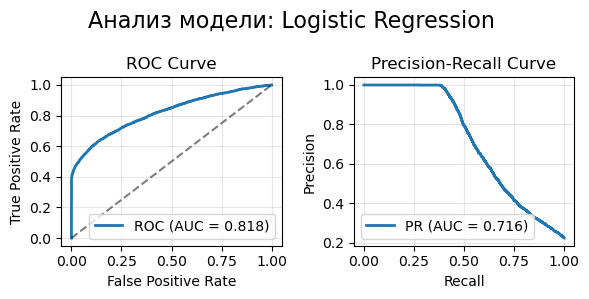

In [36]:
pred_class = best_model.predict(X_val_scl)
pred_proba = best_model.predict_proba(X_val_scl)
results = evaluate_credit_model(y_val, pred_class, pred_proba, "Logistic Regression ")

–°—É—â–µ—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ –ø—Ä–∏—Ä–æ—Å—Ç–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞ –Ω–µ –ø—Ä–æ–∏–∑–æ—à–ª–æ. –ü–æ–ø—Ä–æ–±—É–µ–º –ø–æ–¥–æ–±—Ä–∞—Ç—å –µ—â–µ –±–æ–ª–µ–µ —Ç–æ—á–Ω—ã–π –∫–æ—ç—ç—Ñ–∏—Ü–∏–µ–Ω—Ç —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏.

In [40]:
param_grid = {
    'C': [5, 7, 10, 13, 15, 17, 20],  # —Å–∏–ª–∞ —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏
}
# –ó–∞–ø—É—Å–∫–∞–µ–º GridSearch
grid_search = GridSearchCV(
    LogisticRegression(random_state=42, class_weight='balanced', solver='saga'),
    param_grid,
    cv=cv,  # –∏—Å–ø–æ–ª—å–∑—É–µ–º –∏—Å–ø—Ä–∞–≤–ª–µ–Ω–Ω—É—é –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—é
    scoring=scoring,
    refit='recall',  # –æ–ø—Ç–∏–º–∏–∑–∏—Ä—É–µ–º –ø–æ F1
    n_jobs=-1,  # –∏—Å–ø–æ–ª—å–∑—É–µ–º –≤—Å–µ —è–¥—Ä–∞
    verbose=1
)

In [41]:
# –û–±—É—á–∞–µ–º
grid_search.fit(X_train_scl, y_train)

# –õ—É—á—à–∞—è –º–æ–¥–µ–ª—å
best_model = grid_search.best_estimator_
print(f"–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {grid_search.best_params_}")
print(f"–õ—É—á—à–∏–π F1 score: {grid_search.best_score_:.4}")

Fitting 5 folds for each of 7 candidates, totalling 35 fits
–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'C': 7}
–õ—É—á—à–∏–π F1 score: 0.6169


–ü–æ–ø—Ä–æ–±—É–µ–º –æ–±—É—á–∏—Ç—å —ç—Ç—É –ª—É—á—à–µ –º–æ–¥–µ–ª—å –Ω–µ—Ç–æ–ª—å–∫–æ –Ω–∞ train, –Ω–æ –∏ –Ω–∞ validate –≤—ã–±–æ—Ä–∫–µ –∏ —Å—Ä–∞–≤–Ω–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã

In [64]:
temp_train_X = np.vstack((X_train_scl, X_val_scl))
tem_train_y =   np.hstack((y_train, y_val))

In [65]:
best_model.fit(temp_train_X, tem_train_y)

LogisticRegression(C=7, class_weight='balanced', random_state=42, solver='saga')

üìä –ö–û–ú–ü–õ–ï–ö–°–ù–ê–Ø –û–¶–ï–ù–ö–ê –ú–û–î–ï–õ–ò: Logistic Regression 

üéØ –ö–†–ï–î–ò–¢–ù–´–ï –ú–ï–¢–†–ò–ö–ò:
------------------------------
ROC-AUC:      0.8202
Gini:         0.6404
AUC-PR:       0.7244

üìà –ö–õ–ê–°–°–ò–ß–ï–°–ö–ò–ï –ú–ï–¢–†–ò–ö–ò:
------------------------------
Precision (Default): 0.5942
Recall (Default):    0.6229
F1 (Default):       0.6082

üìä –í–ò–ó–£–ê–õ–ò–ó–ê–¶–ò–ò:
------------------------------


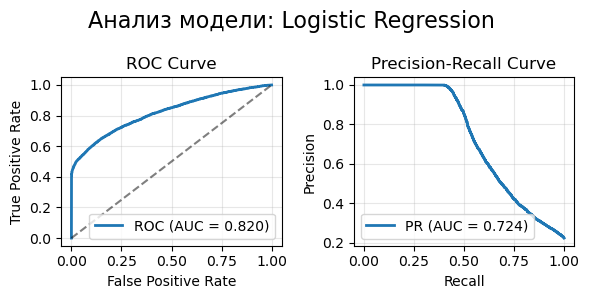

In [67]:
pred_class = best_model.predict(X_test_scl)
pred_proba = best_model.predict_proba(X_test_scl)
results = evaluate_credit_model(y_test, pred_class, pred_proba, "Logistic Regression ")

–°–æ—Ö—Ä–∞–Ω–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ª—É—á—à–µ–π –º–æ–¥–µ–ª–∏ –≤ —Å–≤–æ–¥–Ω—É—é —Ç–∞–±–ª–∏—Ü—É

In [94]:
table_of_results.loc['tuned_logistic_regression'] = results_balanced

In [95]:
table_of_results

ROC-AUC      Gini    AUC-PR  Precision (Default)  \
baseline                   0.822501  0.645002  0.729273             0.944651   
tuned_logistic_regression  0.823747  0.647493  0.727846             0.590425   

                           Recall (Default)  F1 (Default)  
baseline                           0.458777      0.617608  
tuned_logistic_regression          0.629623      0.609394

## 3.3 Decision Tree

–î–∞–Ω–Ω–∞—è –º–æ–¥–µ–ª—å —Ö–æ—Ä–æ—à–æ –ø–æ–¥—Ö–æ–¥–∏—Ç –ø–æ—Ç–æ–º—É —á—Ç–æ:
- –û–Ω–∞ —Ö–æ—Ä–æ—à–æ –∏–Ω—Ç–µ–ø—Ä–∏—Ç–∏—Ä—É–µ–º–∞ (–æ–±—ä—è—Å–Ω–∏–º–∞ –¥–ª—è –±–∏–∑–Ω–µ—Å—Å–∞)
- –ü–æ–∑–≤–æ–ª—è–µ—Ç –ø—Ä–æ–≤–µ—Å—Ç–∏ –æ—Ç–±–æ—Ä –≤–∞–∂–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
- –ù–µ—Ç—Ä–µ–±–æ–≤–∞—Ç–µ–ª—å–Ω–∞ –∫ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
- –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±—ã—Å—Ç—Ä–∞—è 

#### baseModel

In [107]:
data = pd.read_csv('Data\clean_data_no_extra_info.csv')
X, Y = data.drop(['Status'], axis=1), data['Status']

–ö —Å–æ–∂–∞–ª–µ–Ω–∏—é skitlearn —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è —Ä–∞–±–æ—Ç–∞–µ—Ç —Ç–æ–ª—å–∫–æ —Å —á–∏—Å–ª–æ–≤—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏. –ü–æ—ç—Ç–æ–º—É –ø—Ä–∏–º–µ–Ω–µ–º label_encoding

In [111]:
from sklearn.preprocessing import LabelEncoder
def prepare_features_for_tree(X):
  
    X_prepared = X.copy()
    encoders = {}
    
    # –û–±—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º –∫–∞–∂–¥—É—é –∫–æ–ª–æ–Ω–∫—É
    for col in X_prepared.columns:
        if X_prepared[col].dtype == 'object':
            # Label Encoding –¥–ª—è —Å—Ç—Ä–æ–∫–æ–≤—ã—Ö –∫–æ–ª–æ–Ω–æ–∫
            le = LabelEncoder()
            X_prepared[col] = le.fit_transform(X_prepared[col].astype(str))
            encoders[col] = le
            print(f"–ó–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∞ –∫–æ–ª–æ–Ω–∫–∞ '{col}': {len(le.classes_)} –∫–∞—Ç–µ–≥–æ—Ä–∏–π")
    
    return X_prepared, encoders

# –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ
X_encoded, feature_encoders = prepare_features_for_tree(X)

–ó–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∞ –∫–æ–ª–æ–Ω–∫–∞ 'loan_limit': 2 –∫–∞—Ç–µ–≥–æ—Ä–∏–π
–ó–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∞ –∫–æ–ª–æ–Ω–∫–∞ 'Gender': 4 –∫–∞—Ç–µ–≥–æ—Ä–∏–π
–ó–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∞ –∫–æ–ª–æ–Ω–∫–∞ 'approv_in_adv': 2 –∫–∞—Ç–µ–≥–æ—Ä–∏–π
–ó–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∞ –∫–æ–ª–æ–Ω–∫–∞ 'loan_type': 3 –∫–∞—Ç–µ–≥–æ—Ä–∏–π
–ó–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∞ –∫–æ–ª–æ–Ω–∫–∞ 'loan_purpose': 4 –∫–∞—Ç–µ–≥–æ—Ä–∏–π
–ó–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∞ –∫–æ–ª–æ–Ω–∫–∞ 'Credit_Worthiness': 2 –∫–∞—Ç–µ–≥–æ—Ä–∏–π
–ó–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∞ –∫–æ–ª–æ–Ω–∫–∞ 'open_credit': 2 –∫–∞—Ç–µ–≥–æ—Ä–∏–π
–ó–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∞ –∫–æ–ª–æ–Ω–∫–∞ 'business_or_commercial': 2 –∫–∞—Ç–µ–≥–æ—Ä–∏–π
–ó–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∞ –∫–æ–ª–æ–Ω–∫–∞ 'term': 4 –∫–∞—Ç–µ–≥–æ—Ä–∏–π
–ó–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∞ –∫–æ–ª–æ–Ω–∫–∞ 'Neg_ammortization': 2 –∫–∞—Ç–µ–≥–æ—Ä–∏–π
–ó–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∞ –∫–æ–ª–æ–Ω–∫–∞ 'interest_only': 2 –∫–∞—Ç–µ–≥–æ—Ä–∏–π
–ó–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∞ –∫–æ–ª–æ–Ω–∫–∞ 'lump_sum_payment': 2 –∫–∞—Ç–µ–≥–æ—Ä–∏–π
–ó–∞–∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∞ –∫–æ–ª–æ–Ω–∫–∞ 'Secured_by': 2 –∫–∞—Ç–µ–≥–æ—Ä

–î–ª—è –¥–∞–Ω–Ω–æ–≥–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ —Ç–æ—á–Ω–æ –ø–æ–Ω–∞–¥–æ–±–∏—Ç—å—Å—è –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞, –ø–æ—Ç–æ–º—É —á—Ç–æ –¥–µ—Ä–µ–≤—å—è –æ—á–µ–Ω—å —Å–∏–ª—å–Ω–æ –ø–µ—Ä–µ–æ–±—É—á–∞—é—Ç—Å—è –∏ –Ω—É–∂–Ω–æ –ø–æ–¥–±–∏—Ä–∞—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä—ã.

In [112]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data_stratified(X_encoded, Y, need_validate=True)

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤:
Train:      [57688 16628]
Validation: [19229  5543]
Test:       [19230  5543]


In [113]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

üìä –ö–û–ú–ü–õ–ï–ö–°–ù–ê–Ø –û–¶–ï–ù–ö–ê –ú–û–î–ï–õ–ò: Decision tree

üéØ –ö–†–ï–î–ò–¢–ù–´–ï –ú–ï–¢–†–ò–ö–ò:
------------------------------
ROC-AUC:      0.8237
Gini:         0.6475
AUC-PR:       0.7278

üìà –ö–õ–ê–°–°–ò–ß–ï–°–ö–ò–ï –ú–ï–¢–†–ò–ö–ò:
------------------------------
Precision (Default): 0.5904
Recall (Default):    0.6296
F1 (Default):       0.6094

üìä –í–ò–ó–£–ê–õ–ò–ó–ê–¶–ò–ò:
------------------------------


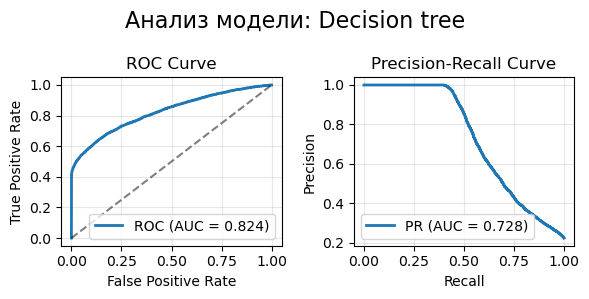

In [116]:
# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred = dt_model.predict(X_test)
y_pred_proba = dt_model.predict_proba(X_test)[:, 1]

# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
results_simple_tree = evaluate_credit_model(y_test, pred_class, pred_proba, "Decision tree")

–ú–æ–¥–µ–ª—å —É–∂–µ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –ø—Ä–∏–µ–º–ª–∏–º—ã–µ —Ä–µ–∑—É–ª—å–∞—Ç—ã. –î–∞–≤–∞–π—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å—Ç—Ä—É–∫—Ç—É—Ä—É –¥–µ—Ä–µ–≤–∞ –∏ –Ω–∞ –≤–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

In [115]:
table_of_results.loc['simple_desicion_tree'] = results_simple_tree
table_of_results

ROC-AUC      Gini    AUC-PR  Precision (Default)  \
baseline                   0.822501  0.645002  0.729273             0.944651   
tuned_logistic_regression  0.823747  0.647493  0.727846             0.590425   
simple_desicion_tree       0.823747  0.647493  0.727846             0.590425   

                           Recall (Default)  F1 (Default)  
baseline                           0.458777      0.617608  
tuned_logistic_regression          0.629623      0.609394  
simple_desicion_tree               0.629623      0.609394

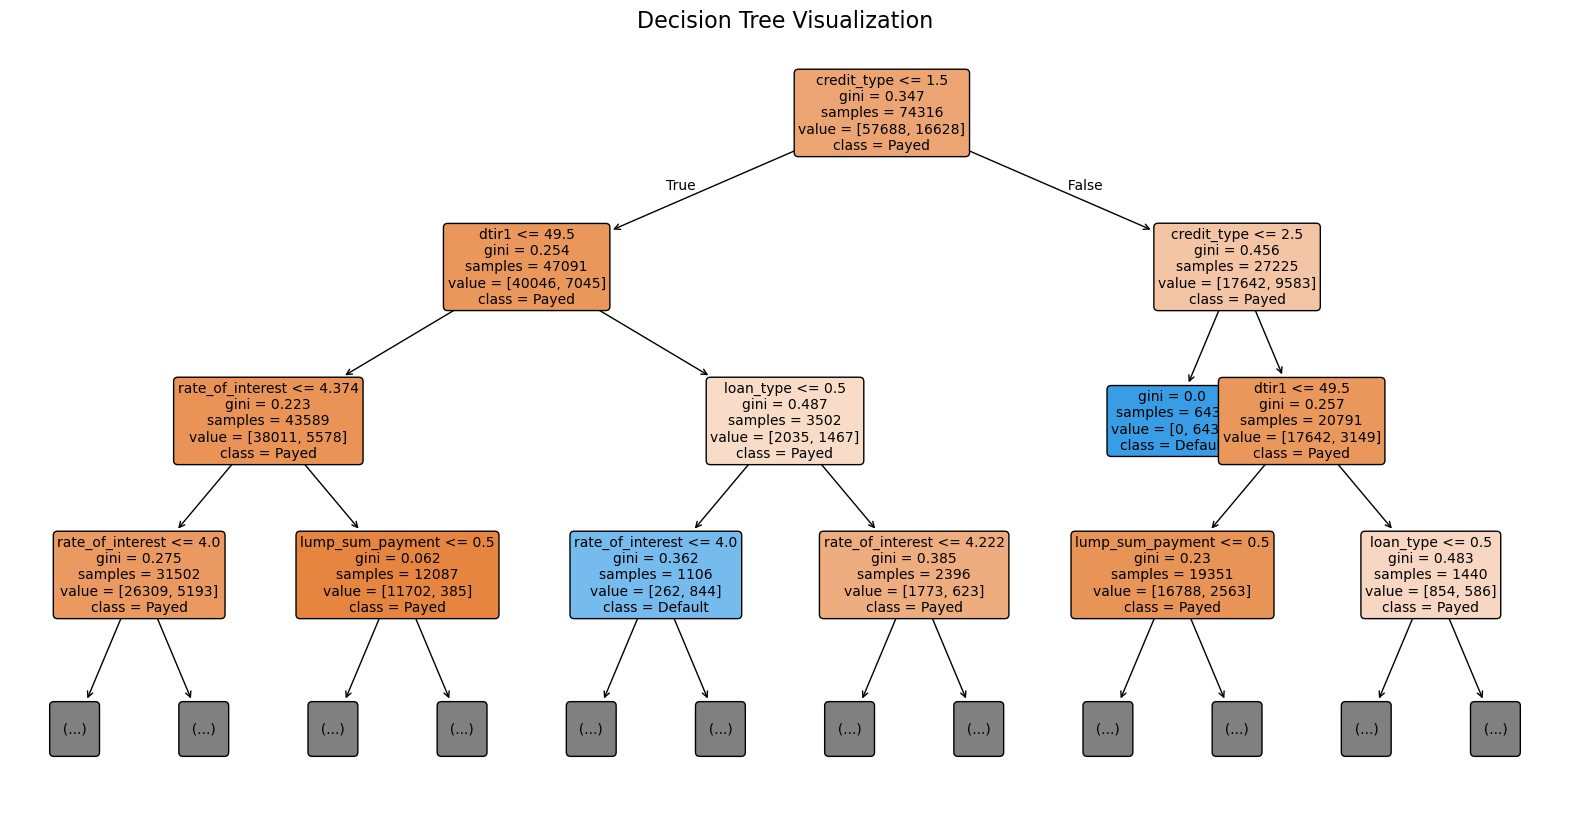

–ü—Ä–∞–≤–∏–ª–∞ –¥–µ—Ä–µ–≤–∞ (–ø–µ—Ä–≤—ã–µ 2 —É—Ä–æ–≤–Ω—è):
|--- credit_type <= 1.50
|   |--- dtir1 <= 49.50
|   |   |--- rate_of_interest <= 4.37
|   |   |   |--- truncated branch of depth 16
|   |   |--- rate_of_interest >  4.37
|   |   |   |--- truncated branch of depth 14
|   |--- dtir1 >  49.50
|   |   |--- loan_type <= 0.50
|   |   |   |--- truncated branch of depth 11
|   |   |--- loan_type >  0.50
|   |   |   |--- truncated branch of depth 11
|--- credit_type >  1.50
|   |--- credit_type <= 2.50
|   |   |--- class: 1
|   |--- credit_type >  2.50
|   |   |--- dtir1 <= 49.50
|   |   |   |--- truncated branch of depth 18
|   |   |--- dtir1 >  49.50
|   |   |   |--- truncated branch of depth 16



In [118]:
def visualize_decision_tree(model, feature_names, class_names, max_depth=3):
    """
    –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è Decision Tree
    """
    plt.figure(figsize=(20, 10))
    
    plot_tree(
        model,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        max_depth=max_depth,  # –û–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ–º –≥–ª—É–±–∏–Ω—É –¥–ª—è —á–∏—Ç–∞–µ–º–æ—Å—Ç–∏
        fontsize=10
    )
    
    plt.title("Decision Tree Visualization", fontsize=16)
    plt.show()
    
    # –¢–µ–∫—Å—Ç–æ–≤–∞—è –≤–µ—Ä—Å–∏—è (–ø–µ—Ä–≤—ã–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ —É—Ä–æ–≤–Ω–µ–π)
    tree_rules = export_text(
        model, 
        feature_names=feature_names,
        max_depth=2  # –¢–æ–ª—å–∫–æ –ø–µ—Ä–≤—ã–µ 2 —É—Ä–æ–≤–Ω—è
    )
    print("–ü—Ä–∞–≤–∏–ª–∞ –¥–µ—Ä–µ–≤–∞ (–ø–µ—Ä–≤—ã–µ 2 —É—Ä–æ–≤–Ω—è):")
    print(tree_rules)

# –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ
feature_names = X_encoded.columns.tolist()
class_names = ['Payed', 'Default']  # –ó–∞–º–µ–Ω–∏—Ç–µ –Ω–∞ –≤–∞—à–∏ –Ω–∞–∑–≤–∞–Ω–∏—è –∫–ª–∞—Å—Å–æ–≤

visualize_decision_tree(dt_model, feature_names, class_names, max_depth=3)

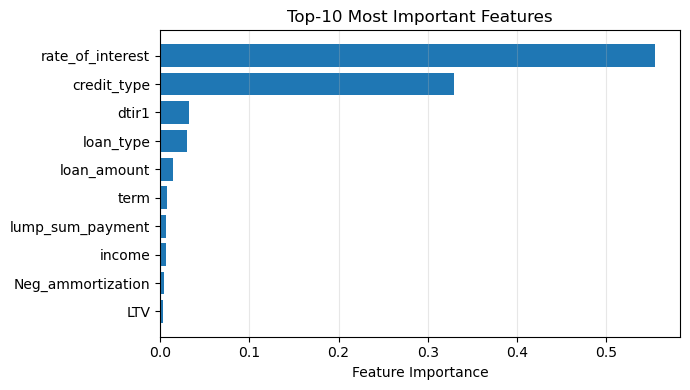

–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
          feature  importance
 rate_of_interest    0.554699
      credit_type    0.328886
            dtir1    0.032568
        loan_type    0.029726
      loan_amount    0.014651
             term    0.007725
 lump_sum_payment    0.006903
           income    0.006572
Neg_ammortization    0.003974
              LTV    0.003447


In [124]:
def analyze_feature_importance(model, feature_names, top_n=15):
    """
    –ê–Ω–∞–ª–∏–∑ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
    """
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
    plt.figure(figsize=(7, 4))
    plt.barh(importance_df['feature'].head(top_n), 
             importance_df['importance'].head(top_n))
    plt.xlabel('Feature Importance')
    plt.title(f'Top-{top_n} Most Important Features')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("–í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:")
    print(importance_df.head(top_n).to_string(index=False))
    
    return importance_df

# –ê–Ω–∞–ª–∏–∑ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
feature_importance = analyze_feature_importance(dt_model, feature_names, top_n=10)

–û–∫–∞–∑–∞–ª–æ—Å—å, —á—Ç–æ —Å–∞–º—ã–µ –≤–∞–∂–Ω—ã–µ —Ñ–∏—á–∏ –¥–ª—è –∞–ª–≥–æ—Ä–∏—Ç–º–∞ - —Å—Ç–∞–≤–∫–∞ –∫—Ä–µ–¥–∏—Ç–∞, —Ç–∏–ø –∫—Ä–µ–¥–∏—Ç–∞ –∏ –¥–æ–ª–≥–æ–≤–∞—è –Ω–∞–≥—Ä—É–∑–∫–∞ –∑–∞—ë–º—â–∏–∫–∞

#### Grid search and pruning

In [126]:
def dt_grid_search_basic(X, y):
    """
    –ë–∞–∑–æ–≤—ã–π GridSearch –¥–ª—è Decision Tree
    """
    # –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è –ø–æ–∏—Å–∫–∞
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [3, 5, 7, 10, 15, 20, None],
        'min_samples_split': [5, 10, 20],
        'min_samples_leaf': [5, 10, 20],
        'max_features': ['sqrt', 'log2', None],
        'class_weight': [None, 'balanced']
    }
    
    # –ú–µ—Ç—Ä–∏–∫–∏
    scoring = {
        'f1': make_scorer(f1_score),
        'roc_auc': make_scorer(roc_auc_score),
        'recall': make_scorer(recall_score)
    }
    
    # –ö—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏—è
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # GridSearch
    grid_search = GridSearchCV(
        DecisionTreeClassifier(random_state=42),
        param_grid,
        cv=cv,
        scoring=scoring,
        refit='recall',  # –û–ø—Ç–∏–º–∏–∑–∏—Ä—É–µ–º –ø–æ F1
        n_jobs=-1,
        verbose=1,
        return_train_score=True
    )
    
    # –ó–∞–ø—É—Å–∫ –ø–æ–∏—Å–∫–∞
    grid_search.fit(X, y)
    
    return grid_search

# –ò—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ
grid_result = dt_grid_search_basic(X_train, y_train)

Fitting 5 folds for each of 756 candidates, totalling 3780 fits


In [127]:
best_dt = grid_result.best_estimator_

In [130]:
best_dt

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

In [141]:
y_pred_proba.shape

(74316,)

In [139]:
y_train.shape

(74316,)

üìä –ö–û–ú–ü–õ–ï–ö–°–ù–ê–Ø –û–¶–ï–ù–ö–ê –ú–û–î–ï–õ–ò: Decision tree

üéØ –ö–†–ï–î–ò–¢–ù–´–ï –ú–ï–¢–†–ò–ö–ò:
------------------------------
(24773,) (24773,)
ROC-AUC:      0.9987
Gini:         0.9974
AUC-PR:       0.9967

üìà –ö–õ–ê–°–°–ò–ß–ï–°–ö–ò–ï –ú–ï–¢–†–ò–ö–ò:
------------------------------
Precision (Default): 0.9731
Recall (Default):    0.9973
F1 (Default):       0.9850

üìä –í–ò–ó–£–ê–õ–ò–ó–ê–¶–ò–ò:
------------------------------


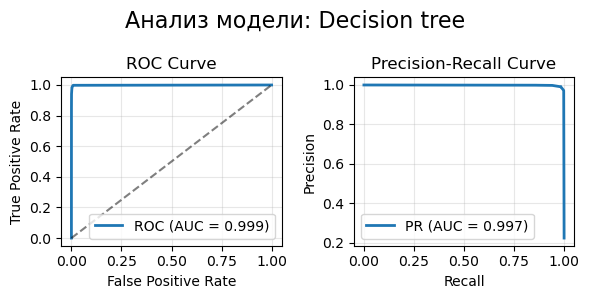

In [148]:
# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred_tree = best_dt.predict(X_test)
y_pred_proba_tree = best_dt.predict_proba(X_test)[:, 1]

# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
results_GS_tree = evaluate_credit_model(y_test, y_pred_tree, y_pred_proba_tree, "Decision tree")

In [132]:
table_of_results.loc['GS_decision_tree'] = results_GS_tree
table_of_results

ROC-AUC      Gini    AUC-PR  Precision (Default)  \
baseline                   0.822501  0.645002  0.729273             0.944651   
tuned_logistic_regression  0.823747  0.647493  0.727846             0.590425   
simple_desicion_tree       0.823747  0.647493  0.727846             0.590425   
GS_decision_tree           0.823747  0.647493  0.727846             0.590425   

                           Recall (Default)  F1 (Default)  
baseline                           0.458777      0.617608  
tuned_logistic_regression          0.629623      0.609394  
simple_desicion_tree               0.629623      0.609394  
GS_decision_tree                   0.629623      0.609394